# <center> Дипломный проект: Обнаружение аномалий в данных мониторинга процессингового центра

## Постановка задачи


<center> <img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK8p91zJzEBr4KWFCaWTvpRDePV3m1PxSZZA&s align="right" width="300"/> </center>

В современном мире, управляемом данными, данные временных рядов повсеместно распространены, охватывая сферы от финансов и электронной коммерции до производства и коммунальных услуг. Данные временных рядов представляют собой непрерывный поток событий. Обнаружение аномалий в этом потоке имеет решающее значение для выявления потенциальных проблем, снижения рисков и извлечения выгоды из возникающих возможностей. Обнаружение аномалий в данных временных рядов играет ключевую роль в таких приложениях, как обнаружение мошенничества, предиктивное обслуживание, сетевой мониторинг и контроль качества.

Последствия необнаруженных аномалий могут быть серьезными, приводя к финансовым потерям, сбоям в работе или даже катастрофическим сбоям. Например, в финансовом секторе аномалии могут указывать на мошеннические действия или нарушения на рынке. В производстве они могут сигнализировать о неисправностях оборудования или проблемах с качеством. Проактивное выявление и устранение этих аномалий может помочь компаниям минимизировать риски, повысить эффективность и сохранить конкурентное преимущество.

Для эффективной эксплуатации сложных технологических систем нужны мониторинг и различные методы аналитики, позволяющие контролировать, управлять, упреждающе менять параметры. Мониторинг, как правило, обеспечивается типовыми инструментами (в большинстве случаев достаточно надежной системы сбора и визуализации данных). В качестве метода для поиска аномалий в мониторинге обычно используется самый простой и наглядный – контроль превышения заданного порога значений.

Однако с ростом сложности и объема данных подходы машинного обучения стали мощными инструментами, предлагающими повышенную точность, адаптивность и способность обрабатывать сложные закономерности и взаимосвязи. Для создания эффективных аналитических инструментов необходимы дополнительные исследования, эксперименты и хорошее знание предметной области. Для прогнозной аналитики как правило используются методы моделирования, в том числе машинное обучение.

Признаки используемые в прогнозных моделях, представляют прошлые значения временных рядов, часто используются для фиксации тенденций и закономерностей с течением времени. Эти признаки могут помочь выявить аномалии, которые отклоняются от недавних исторических закономерностей или тенденций. Включение временных признаков, таких как время суток, день недели или сезонные индикаторы, может улучшить способность модели фиксировать периодические закономерности и учитывать известные циклические поведения.

> Как правило, наборы данных мониторинга бизнес-процессов являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако компания, в которой работает автор данного проекта, предоставляющая услуги процессинга пластиковых и виртуальных карт, предоставила автору набор данных мониторинга, содержащий фактические значения среднего времени авторизаций транзакций по одному из видов карт обслуживаемых компанией. С ним нам как раз и предлагается поработать в этом кейсе. Автор данного проекта очень признателен руководству компании за предоставленный набор данных, и планирует продолжать работать в компании и воплатить данный проект в жизнь с целью усовершенствования технической поддержки процессинга предоставляемого компанией.

> В нашем распоряжении будет набор данных, который содержит ежеминутные значения среднего времени авторизаций транзакций произошедших в период с 13/07/2024 по 12/08/2024.


**Бизнес-задача:** автоматизировать процесс выявления аномалий в данных мониторинга среднего времени авторизаций транзакций.

**Техническая задача для вас как для специалиста в Data Science:** построить модель прогнозирования временного ряда на сутки вперед на основе данных мониторинга среднего времени авторизаций транзакций за последние 30 суток. Далее потребуется ежеминутное сравнение прогноза и фактической величины. Проработать вариант предсказания анамалий в краскосрочной перспективе.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Выявить временные признаки улучшаюшие прогноз, выстроить гипотезы о наличии взаимосвязи временных признаков со зачениями временного ряда. Подтвердить гипотезы статистическими тестами.
3. Построить статистичесую модель и несколько моделей машинного обучения, решающих задачу прогнозирования значений временного ряда.
5. Сравнить полученные результаты с результатами выдаваемыми моделями Prophet и NeuralProphet.
6. Разработать механим проактивного выявления аномалий. Смоделировать работу механизма выявления аномалий.




## Импорт библиотек и сбор данных

Установим недостающие библиотеки.

In [1]:
%%capture
!pip install optuna
!pip install catboost
!pip install neuralprophet
!pip install comet_ml

Предусмотрим логирование проекта.

In [2]:
from comet_ml import Experiment
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="XGjsEKUxVhwgXUldMUc2qysAo",
    project_name="anomaly detector",
    workspace="askornyakov1977",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/askornyakov1977/anomaly-detector/472ae0e583054fc6b8e29c7a7422d4c3



Импортируем используемые библиотеки и модули

In [3]:
import pandas as pd
import numpy as np

import datetime
import time

from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.statespace.sarimax import SARIMAX

from scipy import stats
from scipy.stats import t

import optuna
from optuna.samplers import TPESampler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from neuralprophet import NeuralProphet, set_random_seed, set_log_level

import logging

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


Загрузим данные импортированные из мониторинга процессингового центра

In [4]:
data = pd.read_csv('/content/api01.csv', sep=' ')
data.head()

,date,time,id,value
0,12.08.2024,14:32:24,1723462344,912
1,12.08.2024,14:30:40,1723462240,657
2,12.08.2024,14:29:17,1723462157,872
3,12.08.2024,14:28:14,1723462094,500
4,12.08.2024,14:27:04,1723462024,852


## Подготовка данных

Проверим датасет на наличие дубликатов по дате, часам и минутам

In [5]:
# Создадим отдельное поле по часам и минутам без секунд
data['time_short'] = data['time'].apply(lambda x: x[:5])
duplicated = data[data.duplicated(subset=['date', 'time_short'])]
print(f'Количество дубликатов по дате, часам и минутам (без секунд): {duplicated.shape[0]}')
if duplicated.shape[0]:
  print('Пример дубликата:')
  display(data[(data.date==duplicated.iloc[0].date)&(data['time_short']==duplicated.iloc[0]['time_short'])])

Количество дубликатов по дате, часам и минутам (без секунд): 4138
Пример дубликата:


,date,time,id,value,time_short
20,12.08.2024,14:09:46,1723460986,1196,14:09
21,12.08.2024,14:09:01,1723460941,1227,14:09


Создадим вспомогательный датасет сгруппированный по часам и минутам, агрегирующий данные в квантили нижнего и верхнего уровня доверительного интервала и медиану. Этот датасет понадобится чуть позже для заполнения пропусков и замены выбросов.

In [6]:
# Зададим cкозной интервал квантилей
confidence_level = 0.70
boundaries = round((1 - confidence_level) / 2, 2)
quantiles = [boundaries, confidence_level + boundaries]
# Создадим сгруппированный датасет агрегирующий значения временного ряда по
# квантилям нижнего и верхнего уровня доверительного интервала и медиане
data_groupby_time = data.groupby(['time_short']).value.agg([('lower_bound',
                                                      lambda x: x.quantile(quantiles[0])), 'median',
                                                      ('upper_bound', lambda x: x.quantile(quantiles[1]))])
# На случай пропуска каких либо минут заполним их методом интерполяции
print(f'Количество записей до заполнения пропусков: {data_groupby_time.shape[0]}')
data_groupby_time.index = pd.to_datetime(data_groupby_time.index, format='%H:%M')
data_groupby_time = data_groupby_time.resample('min').mean().interpolate('linear')
print(f'Количество записей после заполнения пропусков: {data_groupby_time.shape[0]}')
print('Основные статистические характеристики сквозных значений временного ряда:')
data_groupby_time.describe()

Количество записей до заполнения пропусков: 1440
Количество записей после заполнения пропусков: 1440
Основные статистические характеристики сквозных значений временного ряда:


,lower_bound,median,upper_bound
count,1440.000000,1440.000000,1440.000000
mean,300.369132,343.182986,478.380243
std,11.924069,31.102221,139.257811
min,255.800000,287.000000,314.850000
25%,293.000000,322.000000,368.000000
50%,301.000000,336.500000,429.875000
75%,307.900000,357.500000,559.625000
max,351.050000,511.000000,1541.250000


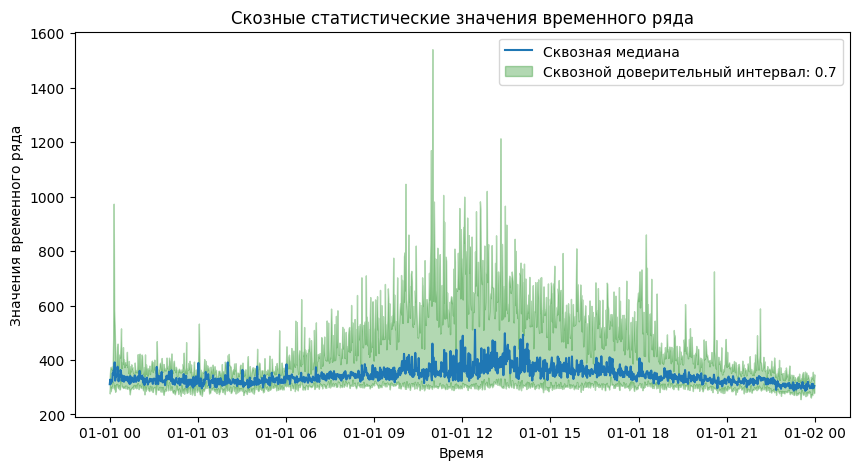

In [7]:
# Строим графики
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(data_groupby_time['median'], label='Сквозная медиана')
ax.fill_between(data_groupby_time.index, data_groupby_time.lower_bound, data_groupby_time.upper_bound,
     alpha=0.3, label=f'Сквозной доверительный интервал: {confidence_level}', color='green')
ax.set_xlabel('Время')
ax.set_ylabel('Значения временного ряда')
ax.set_title('Скозные статистические значения временного ряда')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Мы видим, что даже если ограничить временной ряд пределами довирительного интревала, все равно в дневное время и в начале суток остаются выбросы. Скорее всего это особенность работы процессинового центра. В дневное время идет повышенное количество обслуживаний клиентов. В начале суток идет нагрузка на инфрастуктуру процессинга, свазанная с регламентными бизнес-процессами.

Далее преобразуем основной датасет в удобный вид.

In [8]:
# Сгенирируем новый признак включающий дату и время, без учета секунд.
data['date_time'] = pd.to_datetime(
        data[['date', 'time_short']].apply(lambda x: x.iloc[0]+' '+x.iloc[1], axis=1),
        format='%d.%m.%Y %H:%M')
# Для удобства работы с данными, новый признак сделаем индексом. Удалим лишние поля.
data = data.set_index('date_time').sort_index(ascending=True)
data = data.drop(['date', 'time', 'time_short', 'id'], axis=1)
data.columns = ['y']
data.head()

,y
date_time,
2024-07-13 14:33:00,785
2024-07-13 14:34:00,547
2024-07-13 14:35:00,448
2024-07-13 14:36:00,415
2024-07-13 14:38:00,381


Сделаем декомпозицию временного ряда

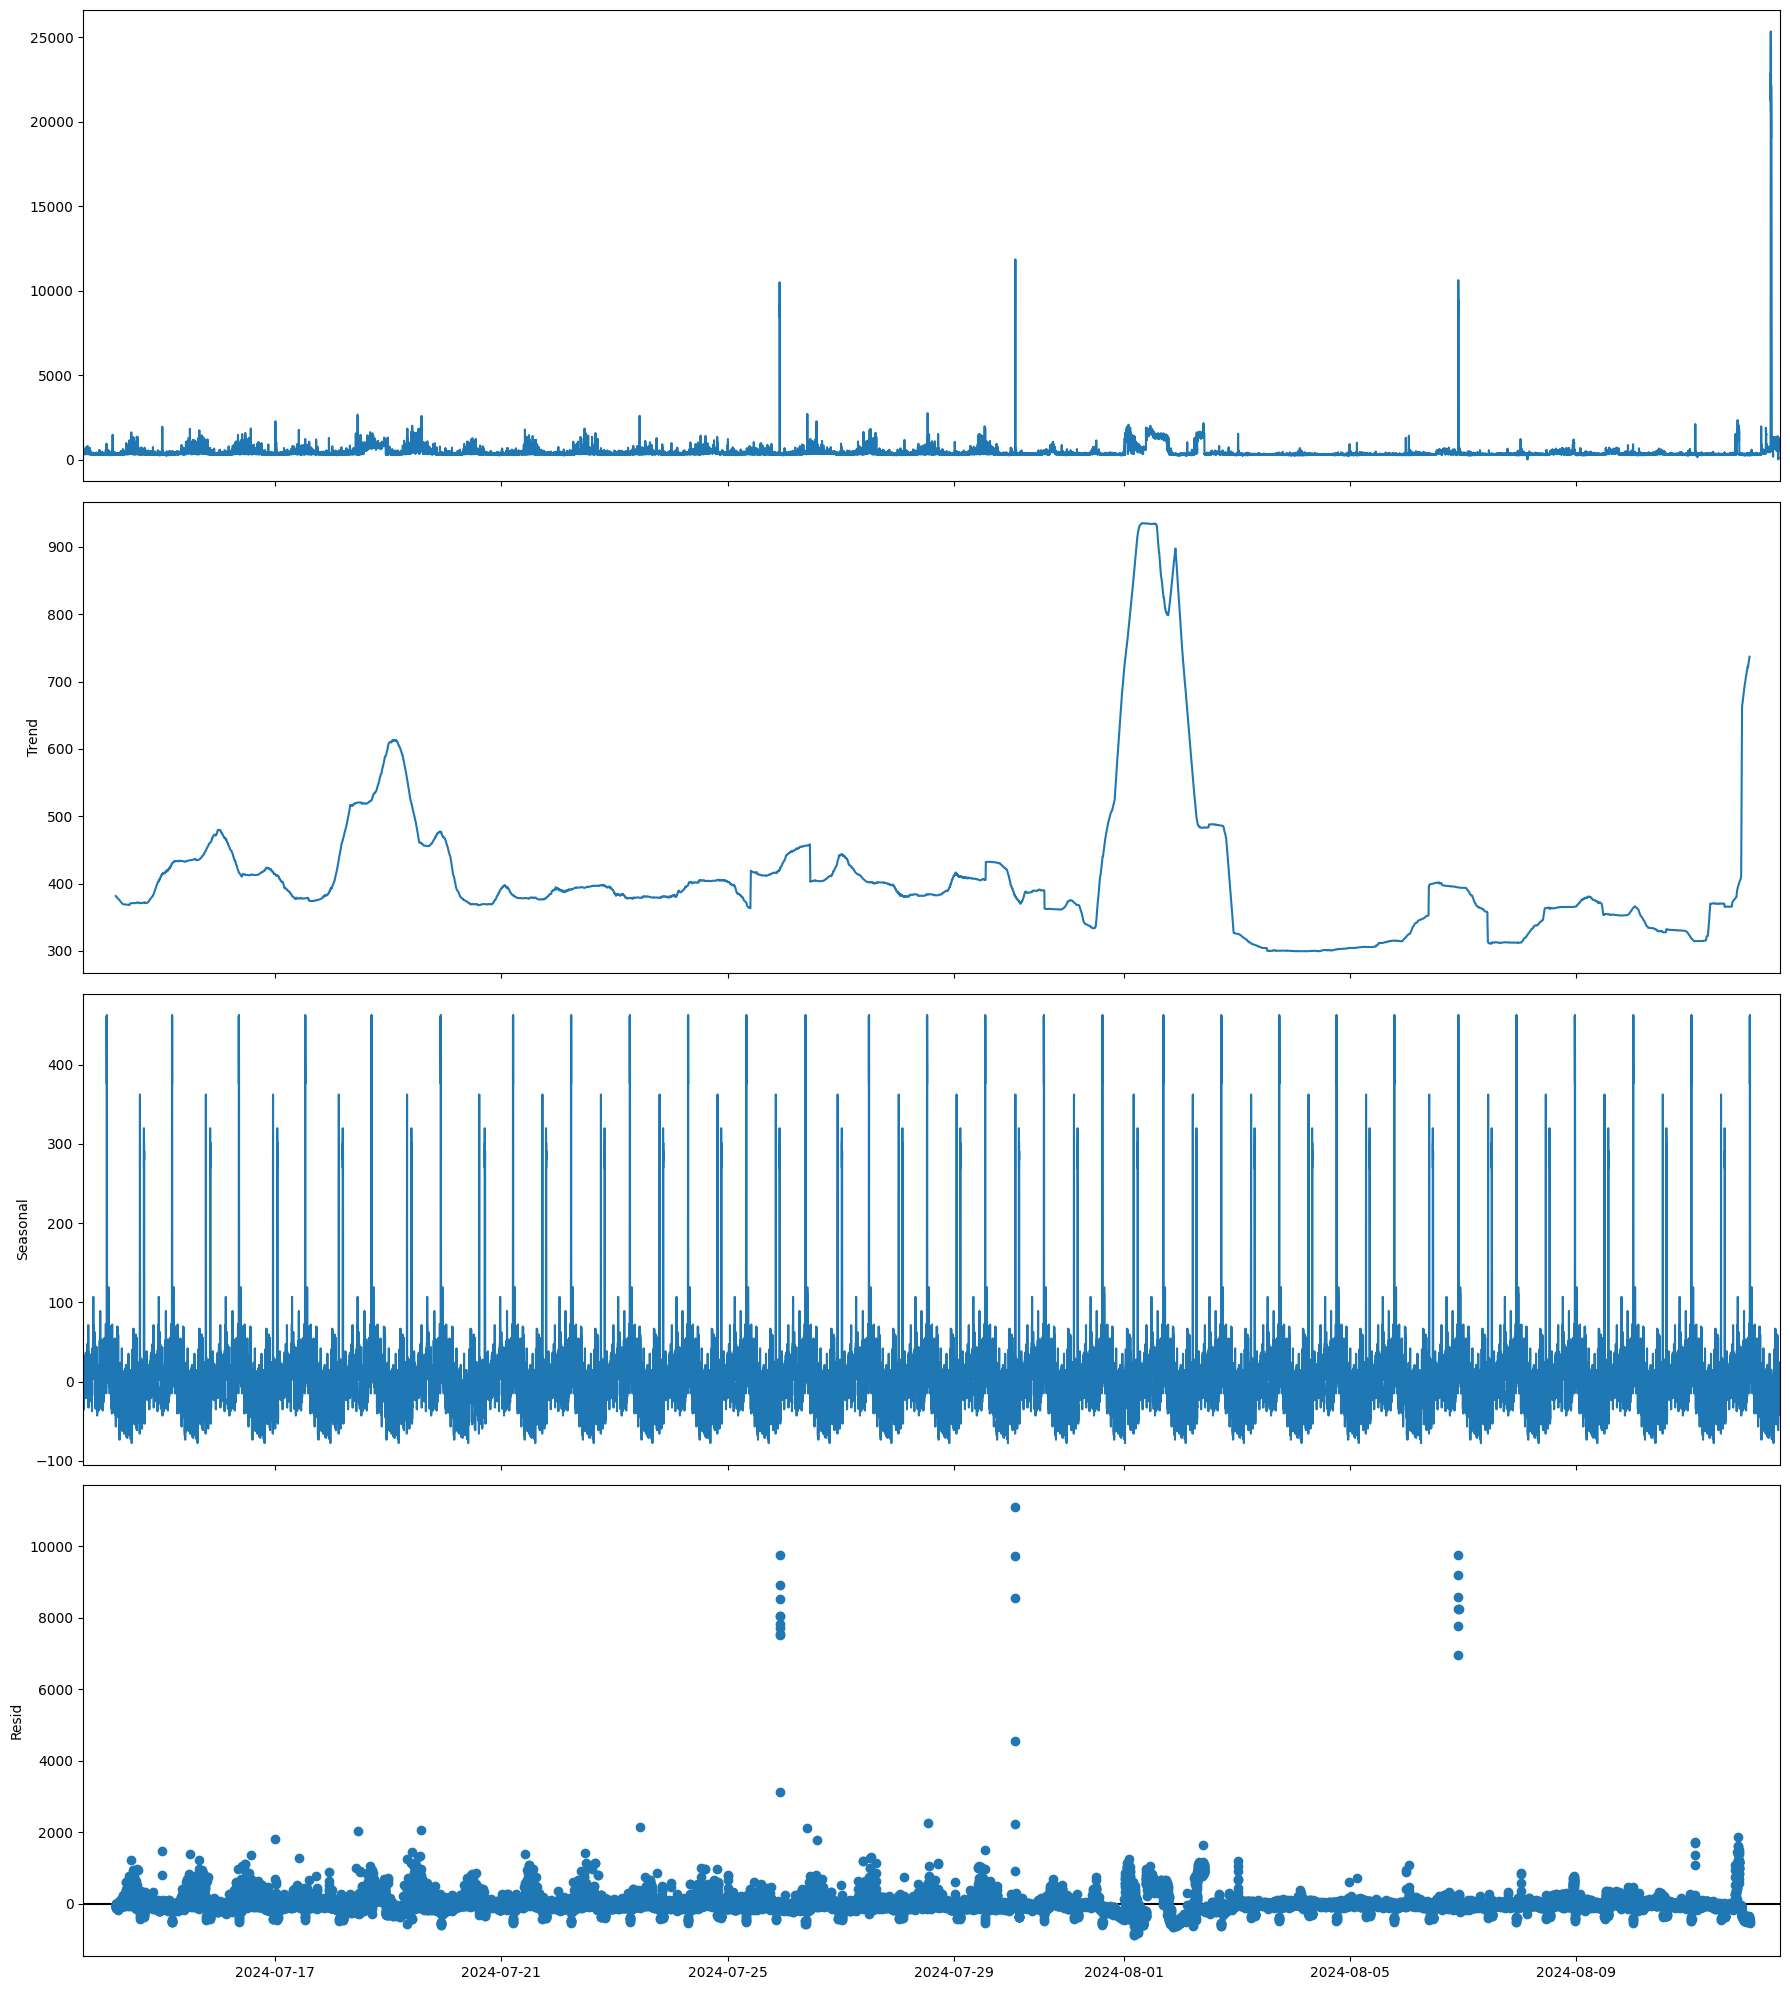

In [9]:
plt.rcParams["figure.figsize"] = 18, 20

decomposition = seasonal_decompose(data, model='additive', period=24*60)
decomposition.plot()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show() # любуемся результатом

Мы видим, что временной ряд имеет аномальные значения ввиде единичных и групповых выбросов. Тренд не имеет выраженную тенденцию к росту или падению, зависит от аномалий, хотя незначительное падение есть. Временной ряд имеет суточную сезунную составляющую. Остатки состоят из белого шума и аномалий. Пора избавляться от аномальных значений, т.к. они не приносят пользу алгоритму.

Для начала заполним значениями Nan пропущенные минуты и объединим дубликаты по часу и минуте в одну запись со средним значением.

In [10]:
print(f'Количество записей до заполнения пропусков и объединения дубликатов: {data.shape[0]}')
# Добавим недостающие минуты с пустыми значениями
data = data.resample('min').mean()
print(f'Количество записей после заполнения пропусков и объединения дубликатов: {data.shape[0]}')

Количество записей до заполнения пропусков и объединения дубликатов: 40109
Количество записей после заполнения пропусков и объединения дубликатов: 43200


Далее предлагается заменить пустые значения и выбросы медианными значениями. Но только не медианой всего временного ряда, и не скользящей медианой, берущей окно предыдущих значений определенной ширины, а медианой значений аналогичных часов и минут проходящей через весь временной ряд. Назовем данную медиану скозной, т.к. она проходит сквозь весь временной ряд, но только через определенный час и минуту. Для этого из основного датасета был подготовлен вспомогательный датасет сгруппированный по часу и минуте, содержащий нижний и верхний пороги доверительного интервала (для определения выбросов) и скозное медианное значение, которое будет присваиваться вместо аномалии.

И так, заполним все значения Nan и выбросы сквозным медианным значением.

In [11]:
# Создадим функцию возвращающую сквозное медианное значение,
# соответствующее часу и минуте, к которым относится входящее значение,
# если входящее значение не находится в пределах доверительного интервала,
# иначе функция возвращает входящее значение
def get_norm_y(series):
    y = data_groupby_time.loc[datetime.time(series.name.hour, series.name.minute)].iloc[0]
    if  series.y > y.lower_bound and series.y < y.upper_bound:
        return series.y
    else:
        return y['median']
# Создадим отдельный целевой признак очищенный от выбросов и пустых значений,
# путем их замены скозным медианным значением
data['y_clean'] = data.apply(get_norm_y, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43200 entries, 2024-07-13 14:33:00 to 2024-08-12 14:32:00
Freq: T
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        35971 non-null  float64
 1   y_clean  43200 non-null  float64
dtypes: float64(2)
memory usage: 1012.5 KB


Мы видим, что у нового целевого признака нет пустых значений. Далле визуально оценим на сколько стало меньше выбросов у очищенного временного ряда.

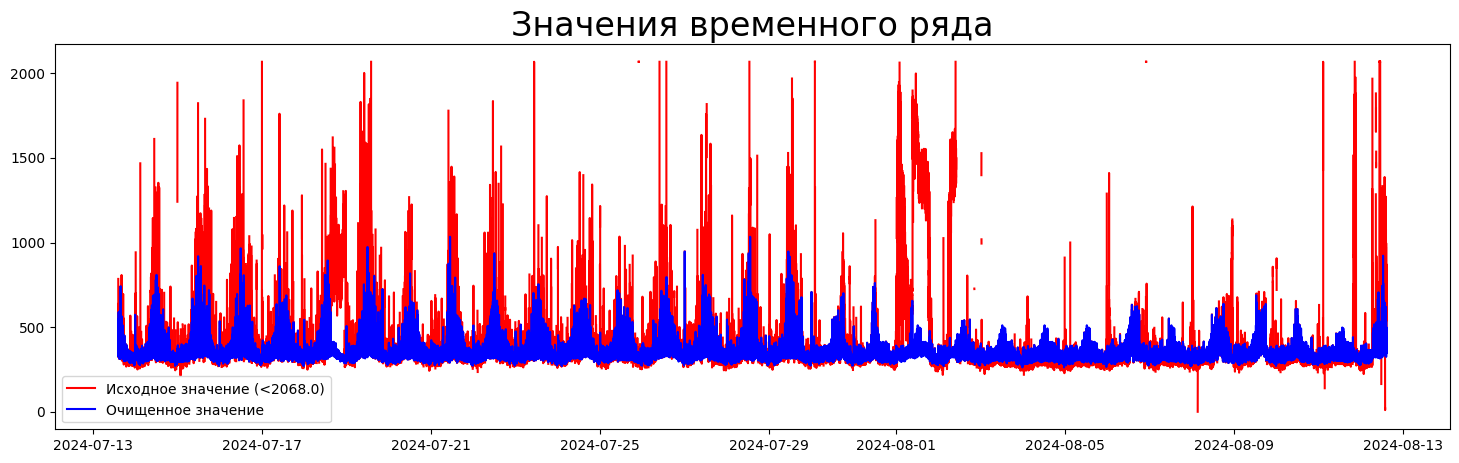

In [12]:
plt.rcParams["figure.figsize"] = 18, 5
upper = data.y_clean.max() * 2
fig, ax = plt.subplots(1, 1)
ax.plot(data.y.apply(lambda x: upper if x > upper else x), color="red", label=f'Исходное значение (<{upper})')
ax.plot(data.y_clean, color="blue", label='Очищенное значение')
ax.legend()
ax.set_title("Значения временного ряда", size=24);
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

И так судя по графику мы избавились от значительных выбросов, и все же незначительные выбросы остались, но это нормально, поэтому будем считать очищенные данные мониторинга готовы к разведывательному анализу.

## Разведывательный анализ данных

Постараемся выявить тренд путем сглаживания временного ряда при помощи скользящего среднего с более широкими окнами.

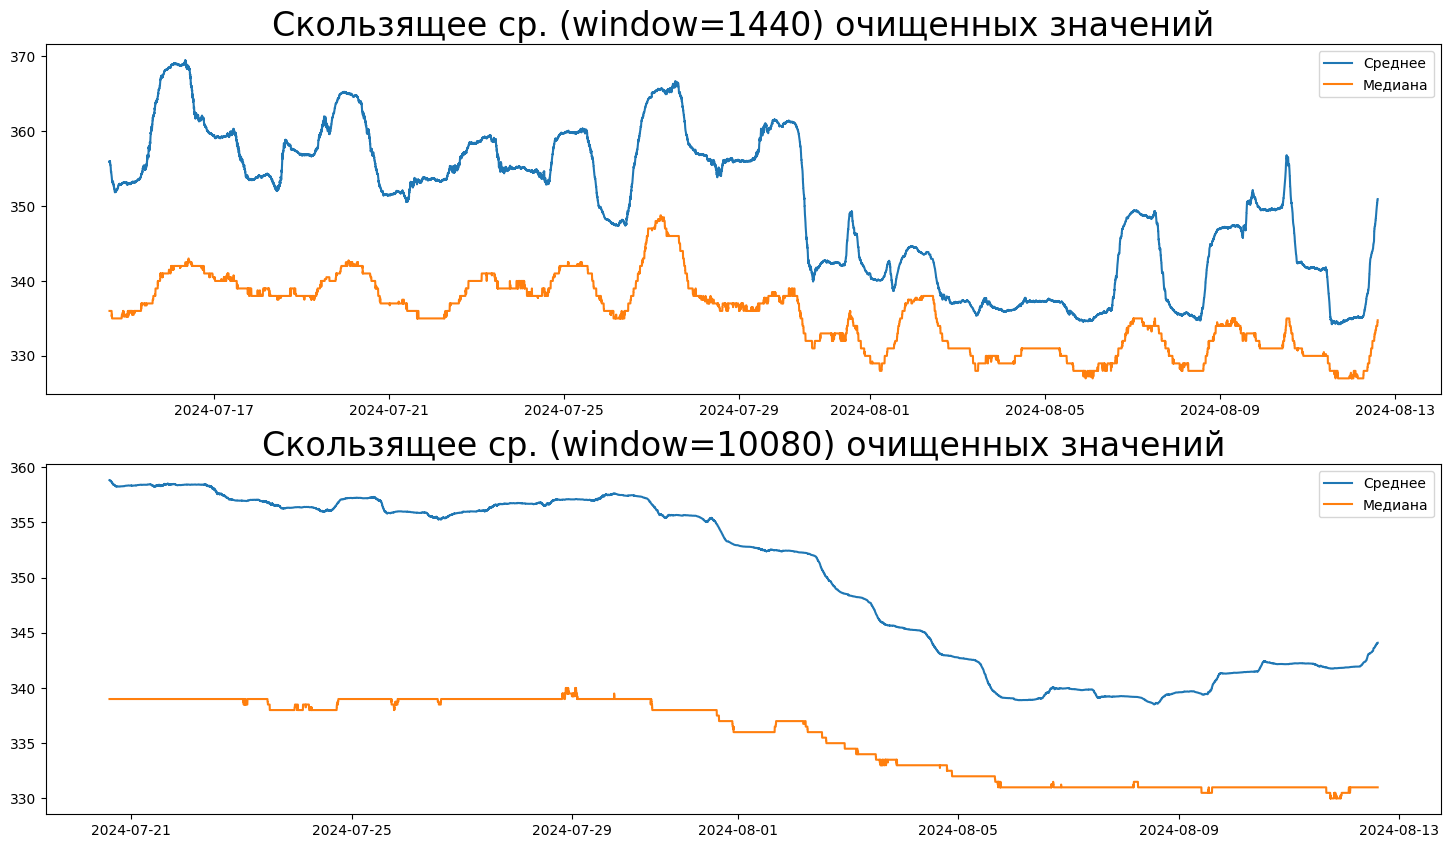

In [13]:
plt.rcParams["figure.figsize"] = 18, 10
upper = data.y_clean.max() * 2
fig, ax = plt.subplots(2, 1)

window = 1440
ax[0].plot(
    data.y_clean.rolling(window=window).mean(), label='Среднее')
ax[0].plot(
    data.y_clean.rolling(window=window).median(), label='Медиана')
ax[0].legend()
ax[0].set_title(f'Скользящее ср. (window={window}) очищенных значений', size=24)

window = 1440*7
ax[1].plot(
    data.y_clean.rolling(window=window).mean(), label='Среднее')
ax[1].plot(
    data.y_clean.rolling(window=window).median(), label='Медиана')
ax[1].legend()
ax[1].set_title(f'Скользящее ср. (window={window}) очищенных значений', size=24)
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

На основании скользящего мат.ожидания фиксируем наличие нелинейного тренда или цикличности. Не будем забывать, что среднее, учитывает минимумы и максимумы, т.е. чувствительно к выбросам. Поэтому, что бы еще более сгладить кривую временного ряда, воспользуемся медианой. Мы видим, что как бы мы не старались избавиться от выбросов, все равно скользящее мат.ожидание временного ряда меняется во времени и скорее всего имеет цикличность, т.к. в конце временной ряд снова пошел на подьем. Но так или иначе делать окончательные выводы затруднительно, т.к. выборка всего за 30 суток.

И так наглядно, мы видим, что временной ряд не стационарен, он имеет скорее всего цикличность, т.е. мат.ожидание данных мониторинга меняется в течение 30 суток. Поэтому для более качественного прогноза требуется генерировать временной признак указывающий на давность данных в сутках. Однако кроме выводов основанных на визуализации, необходимо провести статестические тесты подтвердающие гипотезу о том, что данные временного ряда имеют взаимосвязь давностью значений временного ряда.

### Влияет давность данных на значения временного ряда?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: значения временного ряда не зависят от давности: первые сутки наблюдений ($μ_1$), вторые сутки наблюдений ($μ_2$) и так далее, n-e сутки наблюдений  ($μ_n$).

$$ H_0 : μ_1 = μ_2 = ... = μ_n$$

*Альтернативная гипотеза*: значения временного ряда зависят от давности: первые сутки наблюдений ($μ_1$), вторые сутки наблюдений ($μ_2$) и так далее, n-e сутки наблюдений  ($μ_n$).

$$ H_1 : μ_1 \neq μ_2 \neq ... \neq μ_n$$

Выберем подходящий статистический тест.

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип значений у временного ряда? — Количественный.
* Сколько сравниваемых групп? — Количестко суток во временном ряду: 30.
* Группы зависимы? — Нет.
* С помощью теста Шапиро-Уилка проверим, распределёны ли нормально отдельно выборки по каждым суткам давности. Все выборки распределёны по нормальному закону? — если да, тогда для проверки нашей гипотезы можно использовать однофакторный дисперсионный анализ (ANOVA), иначе критерий Краскела — Уоллиса.

Зададим уровень значимости и объявим вспомогатльную функцию по проверке нормальности распределения выборок и проведения соответсвующего теста на равенство выборок.

In [14]:
# задаём уровень значимости
alpha = 0.05

def test_samples_equal(samples):
    results = []
    # Проведем тест по каждой выборке на предмет нормальности распределения
    norm = True
    for sample in samples:
        # проводим тест Шапиро-Уилка
        p = stats.shapiro(sample)[1]
        if p <= alpha:
            norm = False
            break
    # Проведем тест в зависимости от наличия выборок по которым распределение отлично от нормального
    if norm:
        # проводим тест one-way ANOVA tests
        _, p = stats.f_oneway(*samples)
    else:
        # проводим тест Kruskal-Wallis H-test
        _, p = stats.kruskal(*samples)
    # Выведем р-уровень значимости
    return p


Для того чтобы оставшиеся выбросы оказывали меньше влияния на тесты равенства выборок, сгруппируем в медианы каждые 6 строк датасета, для этого применим downsampling, т.е. каждый час разобьем на 10 частей по 6 минут.

In [15]:
data_resample = data.resample('6min').median()

Сформируем временные признаки необходимые для формирования отдельных выборок по суткам давности состоящие и по каждому часу.

In [16]:
data_resample['age_in_day'] = (data_resample.index.max() - data_resample.index).days
data_resample['hour_of_day'] = data_resample.index.strftime('%H').astype('int')

Сформируем выборки для каждых суток давности, с накоплением, и каждого часа суток отдельно.

In [17]:
# Создадим лист, каждый элемент которого будет относится к определенному часу
samples = []
# Создадим отсортированный лист суток давности, последние сутки не берем, т.к. там может быть мало наблюдений
ages_in_day = sorted(data_resample.age_in_day.unique())[:-1]
# Запустим цикл из 24 часов
for hour_of_day in range(24):
    # Добавим в лист, в текущий час, лист выборок по всем дням давности кроме нулевого, с накоплением
    samples.append([])
    for age_in_day in ages_in_day[1:]:
        samples[-1].append([data_resample[(data_resample.age_in_day==day)&(data_resample.hour_of_day==hour_of_day)].y_clean.values
                     for day in ages_in_day[:age_in_day+1]])

Проведем тест на равенство между выборками по разным суткам давности, с накоплением, для кадого часа суток. Сформируем датасет с результатами тестов.

In [18]:
# Сформируем словарь-заготовку для наполнения его результатами тестов
results = {'age_in_day': [], 'hour_of_day': [], 'p-value': []}
# Запускаем цикл по часам суток
for hour_of_day, samples_hour_of_day in enumerate(samples):
    # Запускаем цикл по суткам давности
    for age_in_day, samples_age_in_day in enumerate(samples_hour_of_day):
        # Заполняем словарь
        results['age_in_day'].append(age_in_day+1)
        results['hour_of_day'].append(hour_of_day)
        p = test_samples_equal(samples_age_in_day)
        results['p-value'].append(round(p, 6))
# Создаем датасет из словаря
df_results = pd.DataFrame(results)

Визуализируем результаты тестов

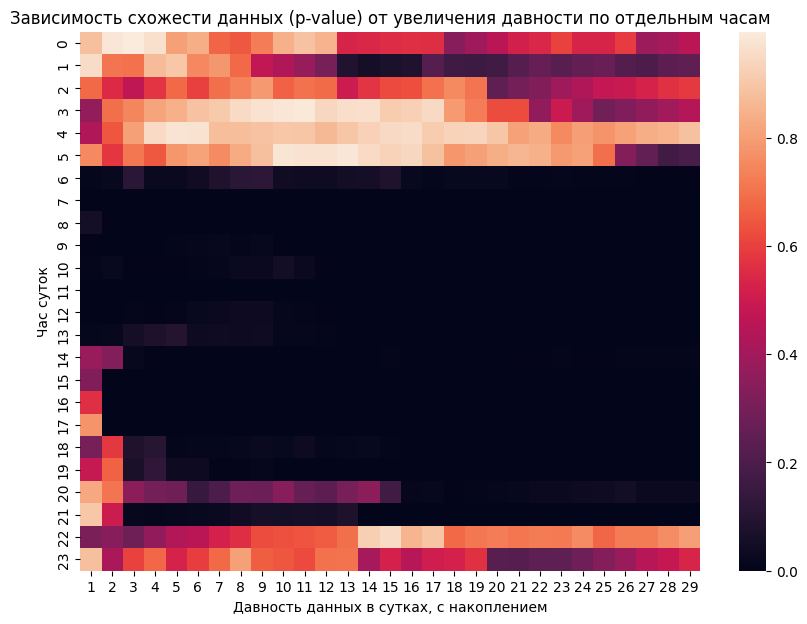

In [19]:
# Формируем сводную таблицу
df_pivot = df_results.pivot(columns='age_in_day', index='hour_of_day', values='p-value')
# Выводим визуализацию
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.heatmap(df_pivot, ax=ax);
ax.set_title('Зависимость схожести данных (p-value) от увеличения давности по отдельным часам')
ax.set_xlabel('Давность данных в сутках, c накоплением')
ax.set_ylabel('Час суток')
# Логируем тепловую диаграмму
experiment.log_figure(figure=plt)
plt.show()

По тепловой карте мы видим, что в дневное время мы отвергаем нулевую гипотезу о том, что выборки равны между собой. В дневное время идет повышенная нагрузка на процессинговый центр, и в это время чаще всего происходят точечные и групповые аномалии. В вечернее и ночное время, выборки не отличаются. В общем это говорит о том, что при прогнозе значений временного ряда, можно и нужно учитывать давность данных и это принесет увеличение прогнозной способности модели.

### Влияет день недели на значения временного ряда?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: значения временного ряда не зависят от давности: первый день недели наблюдений ($μ_1$), второй день недели наблюдений ($μ_2$) и так далее, 7-й день недели наблюдений ($μ_7$).

$$ H_0 : μ_1 = μ_2 = ... = μ_7$$

*Альтернативная гипотеза*: значения временного ряда зависят от давности: первый день недели наблюдений ($μ_1$), второй день недели наблюдений ($μ_2$) и так далее, 7-й день недели наблюдений ($μ_7$).

$$ H_1 : μ_1 \neq μ_2 \neq ... \neq μ_7$$

Подходящий статистический тест выбираем по такому алгоритму, что и в предыдущий раз.
Сформируем временные признаки необходимые для формирования отдельных выборок по дням недели и по неделям года.

In [20]:
data_resample['day_of_week'] = data_resample.index.strftime('%w').astype('int')
data_resample['week_of_year'] = data_resample.index.strftime('%W').astype('int')

Сформируем выборки по всем неделям для каждого дня недели и каждого часа суток отдельно.

In [21]:
# Создадим лист, каждый элемент которого будет относится к определенному часу
samples = []
# Создадим отсортированный лист суток давности
days_of_week = sorted(data_resample.day_of_week.unique())
weeks_of_year = sorted(data_resample.week_of_year.unique())
# Запустим цикл из 24 часов
for hour_of_day in range(24):
    # Добавим в лист, в текущий час, лист выборок по всем дням давности кроме нулевого, с накоплением
    samples.append([])
    for day_of_week in days_of_week:
        samples[-1].append([])
        for week_of_year in weeks_of_year:
            array = data_resample[(data_resample.day_of_week==day_of_week)&
                                            (data_resample.week_of_year==week_of_year)&
                                            (data_resample.hour_of_day==hour_of_day)].y_clean.values
            if list(array):
                samples[-1][-1].append(array)

Проведем тесты на равенство между разными неделями для каждого дня недели отдельно и для кадого часа суток. Сформируем датасет с результатами тестов.

In [22]:
# Сформируем словарь-заготовку для наполнения его результатами тестов
results = {'day_of_week': [], 'hour_of_day': [], 'p-value': []}
# Запускаем цикл по часам суток
for hour_of_day, samples_hour_of_day in enumerate(samples):
    # Запускаем цикл по дням недели
    for day_of_week, samples_day_of_week in enumerate(samples_hour_of_day):
        # Заполняем словарь
        results['day_of_week'].append(day_of_week)
        results['hour_of_day'].append(hour_of_day)
        p = test_samples_equal(samples_day_of_week)
        results['p-value'].append(round(p, 3))
# Создаем датасет из словаря
df_results = pd.DataFrame(results)

Визуализируем результаты тестов

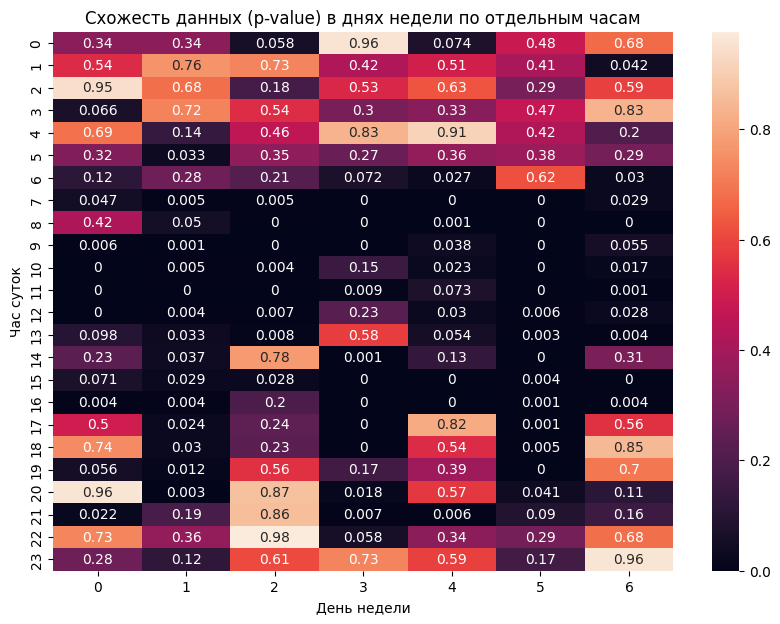

In [23]:
# Формируем сводную таблицу
df_pivot = df_results.pivot(columns='day_of_week', index='hour_of_day', values='p-value')
# Выводим визуализацию
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.heatmap(df_pivot, annot=True, ax=ax);
ax.set_title('Схожесть данных (p-value) в днях недели по отдельным часам')
ax.set_xlabel('День недели')
ax.set_ylabel('Час суток')
# Логируем тепловую диаграмму
experiment.log_figure(figure=plt)
plt.show()

Судя по всему гипотеза о том, что данные одинаковые, в одном и том же дне недели в разных неделях, не подтвердилась, за исключением некоторых вечерних и ночных часов. По этому, что касается данного временного ряда, мы не можем использовать в прогнозах временной признак дня недели.

### Проектирование признаков

Т.к. прогноз значений временного ряда не может обойтись без предыдущих значений, то логике мы должны сгенерировать лаговые признаки. Нам необходимо предсказывать значения временного ряда на сутки вперед. Поэтому мы не можем использовать лаговые признаки с предществующими значениями входящими в последние сутки. Т.е. лаговые признаки должны включать в себя более ранние значения, чем последние сутки. Кроме того временной ряд имеет суточную сезонность, а раз так, то для предсказания значения временного ряда требуется использовать значения за аналогичные моменты времени предшествующих нескольких суток. Наш временной ряд имеет значения всего за 30 суток. Поэтому мы можем сгенерировать порядка 15 лаговых признаков. Таким образом наш временной ряд будет иметь обучающую выборку из 15 суток минус 1 тестовые сутки, итого 14 лаговых признаков, и 14х1440=20160 наблюдений без пропусков. А это уже нежелательно урезание обучающей выборки, мы можем потерять кривую изменения мат.ожидания. Урезать обучающую выборку и без того ограниченную всего 29 сутками, это не очень хорошая идея. Поэтому, что бы не урезать обучающие данные мы не будем генерировать лаговые признаки, а вместо этого сгенерируем временной признак даности в сутках, и категориальные признаки часов и миут, с последующим их однократным кодированием. Этих данных будет достаточно для модели ML, чтобы уловить зависимость значений временного ряда от давности и от часа и минуты.

In [24]:
# Зададим продолжительность сезона в минутах
season = 1440
#window_size = 6
# Создадим лист лагов
lags = [lag for lag in range(int(season), int(data.shape[0]/2+1), season)]
# Для удобства сохраним набор данных в отдельную копию
data_ready = data.copy()
# Удалим неочищенный целевой признак, и переименуем очищенный в убодный вид
data_ready = data_ready.drop('y', axis=1).rename(columns={'y_clean': 'y'})
# Добавим лаговые признаки
#for lag in lags:
#    data_ready[f'lag_{lag}'] = data_ready.y.shift(lag)#.rolling(window_size, center=True).mean()
data_ready = data_ready.dropna()

Сгенерируем признак давности значений временного ряда и признаки часов и минут.

In [25]:
# Сгененируем временные признаки
data_ready['age_in_day'] = (data_ready.index.max() - data_ready.index).days
data_ready['hour'] = data_ready.index.hour
data_ready['minute'] = data_ready.index.minute
data_ready = pd.get_dummies(data_ready, columns=['hour', 'minute'])
# Логируем состав признков
experiment.log_other('data_ready.columns', data_ready.columns)

COMET WARNING: truncated string; too long: 'Index(['y', 'age_in_day', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'minute_0', 'minute_1', 'minute_2', 'minute_3', 'minute_4', 'minute_5',
       'minute_6', 'minute_7', 'minute_8', 'minute_9', 'minute_10',
       'minute_11', 'minute_12', 'minute_13', 'minute_14', 'minute_15',
       'minute_16', 'minute_17', 'minute_18', 'minute_19', 'minute_20',
       'minute_21', 'minute_22', 'minute_23', 'minute_24', 'minute_25',
       'minute_26', 'minute_27', 'minute_28', 'minute_29', 'minute_30',
       'minute_31', 'minute_32', 'minute_33', 'minute_34', 'minute_35',
       'minute_36', 'minute_37', 'minute_38', 'minute_39', 'minute_40',
       'minute_41', 'minute_42', 'minute_43', 'minute_44', 'minute_45',
    

Перед построением разного рода прогнозных моделей, разделим датасет на обучающую и тестовую выборки.

In [26]:
# Вычислим момент времени для разделения датачета на тренировочную и тестовую выборки
split_datetime = data_ready.index.max() - pd.to_timedelta(1, 'd')
# Создадим тренировочную и тестовую выборки
data_train = data_ready[data_ready.index<=split_datetime]
X_train = data_train.drop('y', axis=1)
y_train = data_train.y
data_test = data_ready[data_ready.index>split_datetime]
X_test = data_test.drop('y', axis=1)
y_test = data_test.y

print(f'Размер тренировочной выборки: {data_train.shape}, начало: {data_train.index.min()}, конец: {data_train.index.max()}')
print(f'Размер тестовой выборки: {data_test.shape}, начало: {data_test.index.min()}, конец: {data_test.index.max()}')

Размер тренировочной выборки: (41760, 86), начало: 2024-07-13 14:33:00, конец: 2024-08-11 14:32:00
Размер тестовой выборки: (1440, 86), начало: 2024-08-11 14:33:00, конец: 2024-08-12 14:32:00


Приведем лаговые признаки и временной к единому масштабу.

In [27]:
scaler = MinMaxScaler()
# Подгоняем параметры стандартизатора
scaler.fit(X_train)
# Производим стандартизацию тренировочной выборки
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns=X_train.columns, index=X_train.index)
# Производим стандартизацию тестовой выборки
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                              columns=X_test.columns, index=X_test.index)

Объявим вспомогательную функцию по вычислению метрик.

In [28]:
def get_metrics(data_true, data_pred):
  metric_funcs = {r2_score: 'R2', mean_absolute_percentage_error: 'MAPE',
                  mean_absolute_error: 'MAE', mean_squared_error: 'MSE'}
  return [(metric_funcs[func], func(data_true, data_pred)) for func in metric_funcs]

Создадим заготовку итоговой таблицы

In [29]:
data_result = pd.DataFrame({'Модель': '', ('Время обучения', ''): []}).set_index('Модель')

## Построение прогнозных моделей

### Статистическая модель SARIMAX

Т.к. временной ряд имеет сезонность из 60x24=1440 минут, то необходимо использовать модель Seasonal ARIMA, которая предпологает  дополнительный набор компонентов авторегрессии и скользящего среднего. Для вычисления весовых коэфициентов модели требуются значительные вычислитеные ресурсы. Поэтому для того, что бы уменьшить время обучения модели до приемлемого, мы выполним Downsampling набора данных. Это приведет к уменьшению выборки в несколько раз, но при этом качество прогноза сильно не пострадает.

In [30]:
# Проведем downsampling тренировочных данных c целью снижения вычислительной нагрузки
y_train_resample = y_train.resample('30min').mean()
y_test_resample = y_test.resample('30min').mean()
# Уберем из тестовой выборки значения с индексами, которые есть в обучающей выборке
# y_test_resample = y_test_resample[~y_test_resample.index.isin(y_train_resample.index)]
data_exog = X_train.age_in_day.resample('30min').mean()
print(f'Размер тренировочной выборки: {y_train_resample.shape[0]}, от: {y_train_resample.index.min()}, до: {y_train_resample.index.max()}')
print(f'Размер тестовой выборки: {y_test_resample.shape[0]}, от: {y_test_resample.index.min()}, до: {y_test_resample.index.max()}')

Размер тренировочной выборки: 1393, от: 2024-07-13 14:30:00, до: 2024-08-11 14:30:00
Размер тестовой выборки: 49, от: 2024-08-11 14:30:00, до: 2024-08-12 14:30:00


Для подбора параметров модели, проверим временной ряд на стационарность, и выведем графики автокорреляции и частичной автокорреляции.

adf:  -11.059988386515453
p-value:  4.836558080351759e-20
Critical values:  {'1%': -3.435139190725917, '5%': -2.8636550704859007, '10%': -2.5678960623995417}
Ряд стационарен
Уровень дифференцирования = 0


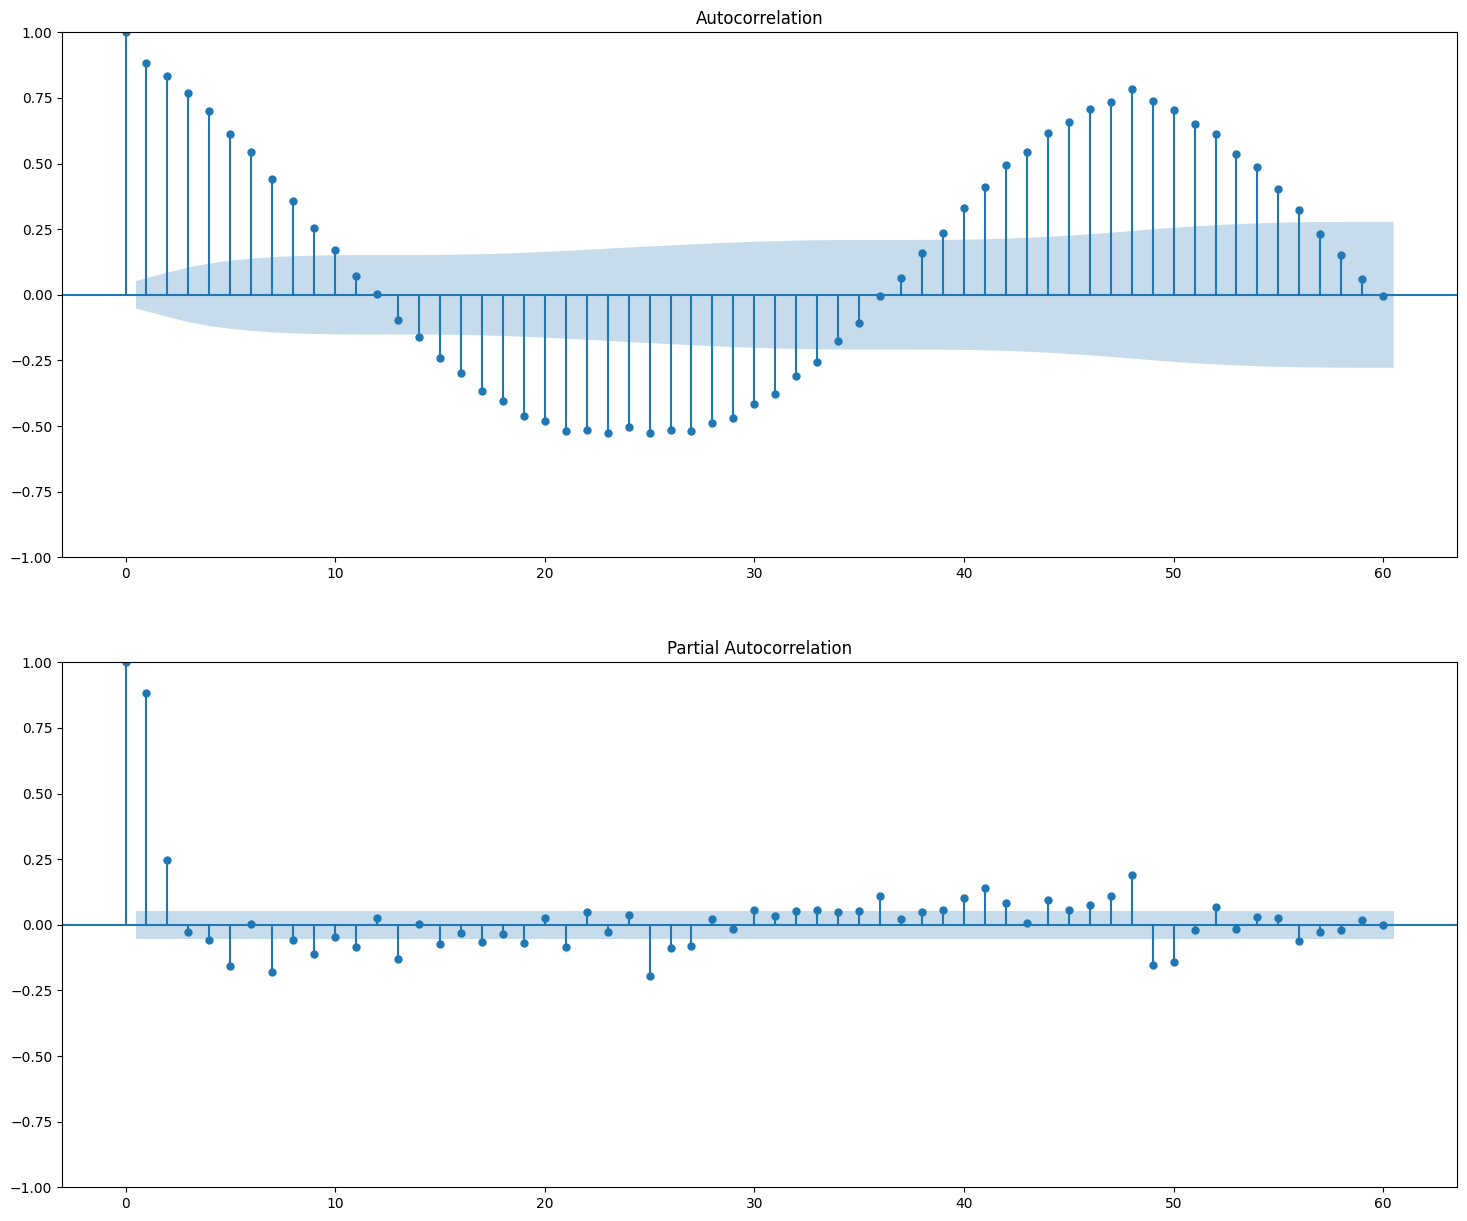

In [31]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 15
    fig, axes = plt.subplots(2, 1)
    sgt.plot_acf(series, ax=axes[0], lags=60)
    sgt.plot_pacf(series, ax=axes[1], lags=60)
    # Логируем тепловую диаграмму
    experiment.log_figure(figure=plt)
    plt.show()

# Функция проверки на стационарность временного ряда методом Дики-Фуллера
def diki_fuler(df, d):
    test = adfuller(df)
    if test[0]> test[4]['5%']:
        d += 1
        df = diki_fuler(df.diff().dropna(), d)
    else:
        print ('adf: ', test[0])
        print ('p-value: ', test[1])
        print ('Critical values: ', test[4])
        print ('Ряд стационарен')
        print(f'Уровень дифференцирования = {d}')

        # Построение графиков Автокорреляции и Частичной автокорреляции
        fig = plot_acf_pacf(df)
        return d
d = diki_fuler(y_train_resample, 0);

Выполнять поиск гиперпараметров статистической модели будет очень затратно по времени, поэтому выберем в ручную подходящие параметры на основании полученных графиков и проведенного теста на стационарность и построим модель. Будем применять в модели признак давности в сутках в качестве экзогенной переменной.

In [32]:
# Инициируем модель с оптимальными параметрами
sarimax_model = SARIMAX(y_train_resample, trend='n',
                      exog=data_exog,
                      order=(2, 0, 11), seasonal_order=(1,0,1,48))
# Обучим модель
start_time = time.time()
sarimax_model_fit = sarimax_model.fit(maxiter=500)
duration_fit_SARIMA = time.time() - start_time
print('Информационный критерий Акаике (AIC):', sarimax_model_fit.aic)
# Логируем параметры модели
experiment.log_other('sarimax_model.order', sarimax_model.order)
experiment.log_other('sarimax_model.seasonal_order', sarimax_model.seasonal_order)
experiment.log_other('sarimax_model.exog_names', sarimax_model.exog_names)
experiment.log_other('sarimax_model_fit.aic', sarimax_model_fit.aic)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'

  warn('Non-stationary starting seasonal autoregressive'



Информационный критерий Акаике (AIC): 10911.573265835345


Получим прогноз тестовых данных, которые модель не видела.

In [33]:
# Сделаем прогноз тестовой выборки
y_pred_test_resample = sarimax_model_fit.predict(start=y_test_resample.index[0],
                                end=y_test_resample.index[-1],
                                exog=np.zeros(y_test_resample.shape[0]-1)
                                )
y_pred_test_resample = pd.DataFrame(
                                y_pred_test_resample).rename(columns={'predicted_mean': 'y'})

Построим доверительный интервал.

In [34]:
confidence_level = 0.95
forecast = sarimax_model_fit.get_forecast(y_pred_test_resample.shape[0]-1,
                                         exog=np.zeros(y_pred_test_resample.shape[0]-1)
                                         )
data_forecast = forecast.conf_int(alpha=1-confidence_level)

Сделаем upsampling прогнозной тестовоый выборки для визуализации и вычисления метрики на основе оригинальных данных.

In [35]:
# Приведем прогноз к частоте тестовой выборки
y_pred_test = y_pred_test_resample.resample('min').mean().interpolate('linear')
# Приведем прогноз к моментам времени тестовой выборки
y_pred_test_sarima = y_pred_test.loc[y_pred_test.index.isin(y_test.index)]

Визуализируем актуальные данные и прогноз.

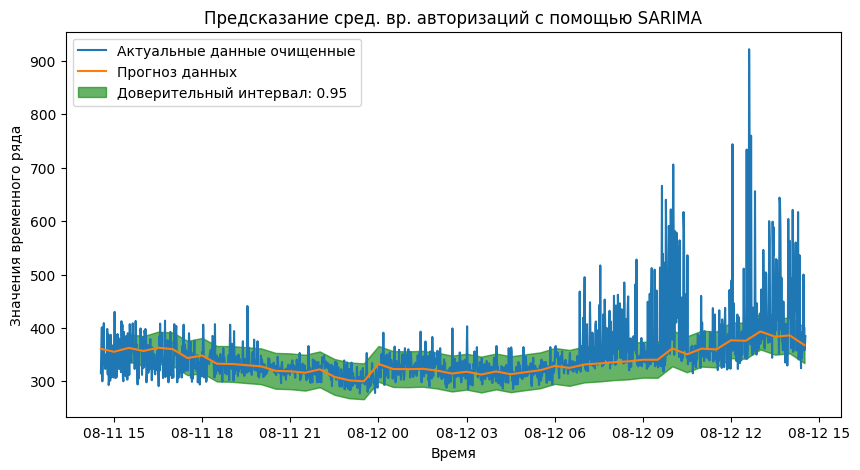

In [36]:
# Строим графики
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test, label='Актуальные данные очищенные')
ax.plot(y_pred_test_sarima.y, label='Прогноз данных')
ax.fill_between(data_forecast.index, data_forecast['lower y'],
                data_forecast['upper y'],
                alpha=0.6, label=f'Доверительный интервал: {confidence_level}', color='green')
ax.set_xlabel('Время')
ax.set_ylabel('Значения временного ряда')
ax.set_title('Предсказание сред. вр. авторизаций c помощью SARIMA')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Модель уловила сезонность и предсказала мат.ожидание временного ряда, которое коррелирует с актуальными данными. Проверим метрику на обучающей и тестовой выборках.

Для проверки модели на предмет переобученности сделаем прогноз обучающей выборки.

In [37]:
# Сделаем прогноз обучающей выборки
y_pred_train_resample = sarimax_model_fit.predict(start=y_train_resample.index[0],
                                end=y_train_resample.index[-1], exog=data_exog)
y_pred_train_resample = pd.DataFrame(y_pred_train_resample).rename(columns={'predicted_mean': 'y'})

Для проверки предсказательной способности модели с данными без downsampling'а, сделаем upsampling прогноза обучающей выборки.

In [38]:
# Приведем прогноз к частоте обучающей выборки
y_pred_train = y_pred_train_resample.resample('min').mean().interpolate('linear')
# Приведем прогноз к моментам времени тестовой выборки
y_pred_train = y_pred_train.loc[y_pred_train.index.isin(y_train.index)]

Сохраним итоговые результаты в отдельную таблицу

In [39]:
data_result = pd.DataFrame({'Модель': '', ('Время обучения', ''): []}).set_index('Модель')

Вычислим метрики модели SARIMAX, которая была с downsampling'ом обучающей выборки.

In [40]:
model_name = 'SARIMAX (downsampling)'
# Добавим продолжительность обучения модели в таблицу итоговых результатов
data_result.loc[model_name, [('Время обучения', '')]] = duration_fit_SARIMA
# Сохраним обучающие метрики в таблице итоговых результатов
metrics = get_metrics(y_train_resample, y_pred_train_resample)
data_result.loc[model_name, [('Обучающие метрики', metric[0])
                       for metric in metrics]] = [metric[1] for metric in metrics]
# Сохраним тестовые метрики в таблице итоговых результатов
metrics = get_metrics(y_test_resample, y_pred_test_resample.y)
data_result.loc[model_name, [('Тестовые метрики', metric[0])
                       for metric in metrics]] = [metric[1] for metric in metrics]
# Логируем метрики
experiment.log_other('result '+ model_name, data_result.loc[model_name].to_dict())

Вычислим метрики с upsampling'ом прогноза.

In [41]:
model_name = 'SARIMAX'
# Добавим продолжительность обучения модели в таблицу итоговых результатов
data_result.loc[model_name, [('Время обучения', '')]] = duration_fit_SARIMA
# Сохраним обучающие метрики в таблице итоговых результатов
metrics = get_metrics(y_train[y_train.index.isin(y_pred_train.index)], y_pred_train)
data_result.loc[model_name, [('Обучающие метрики', metric[0])
                       for metric in metrics]] = [metric[1] for metric in metrics]
# Сохраним тестовые метрики в таблице итоговых результатов
metrics = get_metrics(y_test[y_test.index.isin(y_pred_test_sarima.index)], y_pred_test_sarima.y)
data_result.loc[model_name, [('Тестовые метрики', metric[0])
                       for metric in metrics]] = [metric[1] for metric in metrics]
data_result.columns = pd.MultiIndex.from_tuples(data_result.columns)
# Логируем метрики
experiment.log_other('result '+ model_name, data_result.loc[model_name].to_dict())
print('Итоговые результаты:')
data_result

Итоговые результаты:


Время обучения Обучающие метрики                       \
                                                     R2      MAPE        MAE   
Модель                                                                         
SARIMAX (downsampling)     614.352235          0.800579  0.021735   8.036369   
SARIMAX                    614.352235          0.350497  0.073139  27.730928   

                                    Тестовые метрики                       \
                                MSE               R2      MAPE        MAE   
Модель                                                                      
SARIMAX (downsampling)   247.363282         0.493917  0.041861  16.469421   
SARIMAX                 2050.288947         0.216074  0.068456  27.863274   

                                     
                                MSE  
Модель                               
SARIMAX (downsampling)   783.337800  
SARIMAX                 2898.787559

Не смотря на downsampling обучающей выборки время обучения очень долгое, но раз это особенность статистических моделей и других вариантов их использования нет, то мы готовы подождать.

Высокие метрики в случае их вычисления на данных с downsampling'ом мы не будем брать во внимание, т.к. данные были усреднены, при этом были потеряны все аномалии, поэтому метрики высокие.

Мы будем брать во внимаение метрики, которые были вычислены на основе прогноза подвергнутого обратному upsampling'у. Т.е. прогноз был приведен к частоте оригинальных данных.

Судя по разнице метрик в обучающих и тестовых выборках, полученных на основе прогноза с upsamling'ом переобученность модели не высокая.

Судя по метрике R2 мы делаем вывод о том, что модель предсказывает временной ряд на сутки в перед лучше чем, если бы предсказание строилось на основе среднего арифметического всей тестовой выборки. Но значение данной метрики принято считать хорошим, если оно превышает 0.5. Так или иначе не будем забывать, что данный временной ряд имеет неоднородность наблюдений, выражающееся в неодинаковой дисперсии. Т.е. данный временной ряд обладает гетероскедатичностью. Кроме того всплески и падения значений временного ряда повторяются каждые сутки не в один и тот же момент времени, а плюс, минус несколько минут. Кроме всего прочего, величина вспесков каждые сутки разная. Поэтому о точном прогнозе всех сплеков и падений временного ряда, говорить не приходится, а только лишь о прогнозе ввиде аппроксимации временного ряда. Однако мы можем выявлять аномалии в данных мониторинга, путем выявления актуальных значений временного ряда, находящихся за пределами доверительного интервала, построенного на основе прогноза мат. ожидания на каждый момент времени. К сожалению модель построила доверительный интервал путем прибавления и вычитания некоторой дельты от предсказанного значения. Такой алгоритм скорее всего не подойдет для выполнения задачи выявления аномалий. Т.к. доверительный интервал должен зависить от времении, от дисперсии значений временного ряда в аналогичные моменты предшествующих суток. Т.е. то, что считается аномалией в один момент времени суток, в другой может считаться штатной работой процессинга.

### ML модели

Для происка оптимальных гиперпараметров моделей ML будем использовать продвинутый метод, с использованием библиотеки Optune. Но для того чтобы модели не подстраивались под конкретную обучающую и тестовую выборки, мы будем обучать модель прогнозировать, не только последние сутки, а несколько последних суток по отдельности. Поэтому мы будем выполнять валидацию данных с множественным разбиением обучающей выборки на обучающие и тренировочные фолды. При этом каждый новый обучающий фолд увеличивается на сутки вперед, а тестовый фолд при каждом разбиении будет равен суткам, следующим за обучащим фолдом.
<center> <img src=https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png> </center>
Сначала объявим вспомогательную функцию по валидации данных временного ряда.

In [42]:
def timeseries_validation(model, X_train, y_train, n_splits=3):
  tss = TimeSeriesSplit(n_splits=n_splits, test_size=1440)
  train_test_groups = tss.split(X_train)
  metrics = []
  for train_index, test_index in train_test_groups:
    # обучаем модель
    model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    metrics.append(mean_absolute_percentage_error(y_train.iloc[test_index],
                                          model.predict(X_train.iloc[test_index])))
  return np.mean(metrics)

Объявим целевые функции, отдельно для каждой модели ML. В целевых функциях заданы области для поиска гиперпараметров, происходит инициализация модели по входящему в функцию параметру, далее выполняется валидация на основе обучающей выборки, и выдается средняя метрика.

In [43]:
def optuna_Lasso(trial):
            # задаем пространства поиска гиперпараметров
            model_params =  {
                'alpha': trial.suggest_float("alpha", 0.01, 1, log=False),
                'max_iter': trial.suggest_int("max_iter", 10000, 10000)

              }
            #X_train = data_train.drop(['y'], axis=1)
            # Инициализируем стандартизатор StandardScaler
            #scaler = StandardScaler()
            # Подгоняем параметры стандартизатора
            #scaler.fit(X_train)
            # Производим стандартизацию тренировочной выборки
            #X_train_scaled = scaler.transform(X_train)
            # Создаём генератор полиномиальных признаков
            poly = PolynomialFeatures(degree=2, include_bias=False)
            poly.fit(X_train_scaled)
            #Генерируем полиномиальные признаки для тренировочной выборки
            X_train_poly = pd.DataFrame(poly.transform(X_train_scaled), columns=poly.get_feature_names_out())
            # создаем модель
            model = Lasso(**model_params)
            # запускаем валидацию обучающей выбоки
            score = timeseries_validation(model, X_train_poly, y_train)
            return score

In [44]:
def optuna_Ridge(trial):
            # задаем пространства поиска гиперпараметров
            model_params =  {
                'alpha': trial.suggest_float("alpha", 1, 10, log=False),
                'max_iter': trial.suggest_int("max_iter", 10000, 10000)
              }
            #X_train = data_train.drop(['y'], axis=1)
            # Инициализируем стандартизатор StandardScaler
            #scaler = StandardScaler()
            # Подгоняем параметры стандартизатора
            #scaler.fit(X_train)
            # Производим стандартизацию тренировочной выборки
            #X_train_scaled = scaler.transform(X_train)
            # Создаём генератор полиномиальных признаков
            poly = PolynomialFeatures(degree=2, include_bias=False)
            poly.fit(X_train_scaled)
            #Генерируем полиномиальные признаки для тренировочной выборки
            X_train_poly = pd.DataFrame(poly.transform(X_train_scaled), columns=poly.get_feature_names_out())
            # создаем модель
            model = Ridge(**model_params)
            # запускаем валидацию обучающей выбоки
            score = timeseries_validation(model, X_train_poly, y_train)
            return score

In [45]:
def optuna_RandomForestRegressor(trial):
            # задаем пространства поиска гиперпараметров
            model_params =  {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'max_depth': trial.suggest_int("max_depth", 2, 25),
                'min_samples_leaf': trial.suggest_int("min_samples_leaf", 2, 50),
                #'max_features': trial.suggest_categorical("max_features",
                #                         [0.25, 0.5, 0.75, 1.0, 'sqrt', 'log2']),
                'max_features': trial.suggest_categorical("max_features",
                                          [0.25, 0.5, 0.75, 1.0, 'sqrt']),
                'random_state': trial.suggest_int("random_state", 42, 42),
                'verbose': trial.suggest_int("verbose", 0, 0)
              }
            # создаем модель
            model = RandomForestRegressor(**model_params)
            # запускаем валидацию обучающей выбоки
            score = timeseries_validation(model, X_train_scaled, y_train)
            return score

In [46]:
def optuna_LGBMRegressor(trial):
            # задаем пространства поиска гиперпараметров
            model_params =  {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
                'max_depth': trial.suggest_int("max_depth", 5, 50),
                'learning_rate': trial.suggest_float("learning_rate", 0.001, 0.1, log=False),
                #'num_leaves': trial.suggest_int('num_leaves', 2, 45),
                'subsample': trial.suggest_float("subsample", 0.05, 1, log=False),
                'colsample_bytree': trial.suggest_float("colsample_bytree", 0.05, 1, log=False),
                'min_child_samples': trial.suggest_int("min_child_samples", 5, 100),
                'random_state': trial.suggest_int("random_state", 42, 42),
                'verbosity': trial.suggest_int("verbose", -1, -1),
                'force_col_wise': trial.suggest_categorical("force_col_wise", [True, True])
              }
            # создаем модель
            model = LGBMRegressor(**model_params)
            # запускаем валидацию обучающей выбоки
            score = timeseries_validation(model, X_train_scaled, y_train)
            return score

In [47]:
def optuna_CatBoostRegressor(trial):
            # задаем пространства поиска гиперпараметров
            model_params =  {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
                #'learning_rate': trial.suggest_float("learning_rate", 0.001, 0.2, log=True),
                "depth": trial.suggest_int("depth", 1, 12),
                #"boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
                #"bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
                "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 64),
                "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=False),
                'random_state': trial.suggest_int("random_state", 42, 42),
                'verbose': trial.suggest_int("verbose", 0, 0)
            }
            # создаем модель
            model = CatBoostRegressor(**model_params)
            # запускаем валидацию обучающей выбоки
            score = timeseries_validation(model, X_train_scaled, y_train)
            return score

In [48]:
def optuna_XGBRegressor(trial):
            # задаем пространства поиска гиперпараметров
            model_params =  {
                "max_depth": trial.suggest_int("max_depth", 5, 50),
                'eta': trial.suggest_float("eta", 0.001, 0.3, log=False),
                'max_delta_step': trial.suggest_int('max_delta_step', 1, 10),
                'subsample': trial.suggest_float("subsample", 0.1, 1, log=False),
                'colsample_bytree': trial.suggest_float("colsample_bytree", 0.1, 1, log=False),
                'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.1, 1, log=False),
                'n_estimators': trial.suggest_int("n_estimators", 100, 1500),
                'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
                'learning_rate': trial.suggest_float("learning_rate", 0.001, 0.20, log=True),
                'seed': trial.suggest_int("seed", 42, 42),
                }
            # создаем модель
            model = XGBRegressor(**model_params)
            # запускаем валидацию обучающей выбоки
            score = timeseries_validation(model, X_train_scaled, y_train)
            return score

Приступим непосредственно к поиску оптимальных гиперпараметров множества моделей ML. Метод optuna.study.Study.optimize вызывается циклом, для каждой модели.  Данный метод вызывает целевую функцию заданное кол-во раз. Оптимальные гиперпараметры, отобранные встроенным в Optune байесовский алгоритмом, который учитывает результаты предыдущих вызовов функции, передаются в целевую функцию. По результатам работы процесса оптимизации мы получаем оптимальные гиперпараметры для каждой модели и сохраняем их отдельную структуру для моделей.

In [49]:
# Создадим структуру моделей для хранения ссылок
# на целевые функции оптимизации гиперпараметров,
# найденных оптимальных гиперпараметров и
# выборок с прогнозами моделей
models_ML = {
    LinearRegression: {},
    Lasso: {'func': optuna_Lasso},
    Ridge: {'func': optuna_Ridge},
    RandomForestRegressor: {'func': optuna_RandomForestRegressor},
    LGBMRegressor: {'func': optuna_LGBMRegressor},
    CatBoostRegressor: {'func': optuna_CatBoostRegressor},
    XGBRegressor: {'func': optuna_XGBRegressor}
    }
# Запустим цикл оптимизации гиперпараметров моделей
sampler = TPESampler(seed=42)
optuna.logging.set_verbosity(optuna.logging.WARNING)
for model_ML in models_ML:
  if model_ML!=LinearRegression:
    print('Поиск оптимальных гиперпараметров: ', model_ML.__name__)
    study = optuna.create_study(direction='minimize', study_name=model_ML.__name__, sampler=sampler)
    study.optimize(models_ML[model_ML]['func'], n_trials=15, show_progress_bar=True)
    # Сохраним оптимальные гиперпараметры модели в структуру моделей
    models_ML[model_ML]['best_params'] = study.best_trial.params
    # Логируем оптимальные параметры
    experiment.log_other('best_params ' + model_ML.__name__, str(models_ML[model_ML]['best_params']))

Поиск оптимальных гиперпараметров:  Lasso


  0%|          | 0/15 [00:00<?, ?it/s]

Поиск оптимальных гиперпараметров:  Ridge


  0%|          | 0/15 [00:00<?, ?it/s]

Поиск оптимальных гиперпараметров:  RandomForestRegressor


  0%|          | 0/15 [00:00<?, ?it/s]

Поиск оптимальных гиперпараметров:  LGBMRegressor


  0%|          | 0/15 [00:00<?, ?it/s]

Поиск оптимальных гиперпараметров:  CatBoostRegressor


  0%|          | 0/15 [00:00<?, ?it/s]

Поиск оптимальных гиперпараметров:  XGBRegressor


  0%|          | 0/15 [00:00<?, ?it/s]

Сделаем прогноз циклом всеми моделями, попутно сохраним полученные прогнозы в структуре models_ML и сохраним метрики в таблице итоговых результатов.

In [50]:
for model_ML in models_ML:
  #X_train = data_train.drop(['y'], axis=1)
  #X_test = data_test.drop(['y'], axis=1)
  # Если model_ML линейная модель с регуляризацией,
  # тогда добавим полиномиальные признаки
  if model_ML in(Lasso, Ridge):
            #Инициализируем стандартизатор StandardScaler
            #scaler = StandardScaler()
            # Подгоняем параметры стандартизатора
            #scaler.fit(X_train)
            # Производим стандартизацию тренировочной выборки
            #X_train = scaler.transform(X_train)
            # Производим стандартизацию тестовой выборки
            #X_test = scaler.transform(X_test)
            # Создаём генератор полиномиальных признаков
            poly = PolynomialFeatures(degree=2, include_bias=False)
            poly.fit(X_train_scaled)
            #Генерируем полиномиальные признаки для тренировочной выборки
            X_train = poly.transform(X_train_scaled)
            #Генерируем полиномиальные признаки для тестовой выборки
            X_test = poly.transform(X_test_scaled)
  else:
            X_train = X_train_scaled
            X_test = X_test_scaled
  # Инициируем модель
  if model_ML!=LinearRegression:
            model = model_ML(**models_ML[model_ML]['best_params'])
  else:
            model = model_ML()
  # Обучим модель
  start_time = time.time()
  model.fit(X_train, y_train);
  duration_fit_ML = time.time() - start_time
  # Сохраним продолжительность обучения модели в таблицу итоговых результатов
  data_result.loc[model.__class__.__name__, [('Время обучения', '')]] = duration_fit_ML
  # Сделаем предсказание обучающей выборки
  y_pred_train = model.predict(X_train)
  # Сохраним обучающие метрики в таблице итоговых результатов
  metrics = get_metrics(y_train, y_pred_train)
  data_result.loc[model.__class__.__name__, [('Обучающие метрики', metric[0])
                       for metric in metrics]] = [metric[1] for metric in metrics]
  # Сделаем предсказание тестовой выборки
  y_pred_test = model.predict(X_test)
  # Сохраним тестовые метрики в таблице итоговых результатов
  metrics = get_metrics(y_test, y_pred_test)
  data_result.loc[model.__class__.__name__, [('Тестовые метрики', metric[0])
                       for metric in metrics]] = [metric[1] for metric in metrics]
  # Сохраним предсказания в структуру model_ML
  y_pred_test = pd.DataFrame({'y': y_pred_test}, index=data_test.index)
  models_ML[model_ML]['y_pred_test'] = y_pred_test
  # Для сравнения с SARIMA сохраним предcказания в сглаженном виде
  y_pred_test_resample = y_pred_test.resample('30min', label='left', closed='right').mean()
  y_pred_test_resample = y_pred_test_resample.resample('min').mean().interpolate('polynomial', order=3)
  models_ML[model_ML]['y_pred_test_resample'] = y_pred_test_resample
  # Логируем метрики
  experiment.log_other('result '+ model.__class__.__name__,
                           data_result.loc[model.__class__.__name__].to_dict())
data_result.columns = pd.MultiIndex.from_tuples(data_result.columns)

Т.к. ряд по результату теста Дики-Фуллера является стационарным, и данные повторяются каждые сутки, то сделать прогноз, не сложно. Поэтому добавим для сравнения сквозную медиану (значения временного ряда за определенную минуту за каждые сутки).

In [51]:
# Зададим cкозной интервал квантилей
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
quantiles = [boundaries, confidence_level + boundaries]
data_train.loc[:, ['hour']] = data_train.index.hour
data_train.loc[:, ['minute']] = data_train.index.minute
# Создадим сгруппированный датасет агрегирующий значения временного ряда по статистическим характеристикам
data_groupby_time = data_train.groupby(['hour', 'minute']).y.agg([('lower_quantile',
                                                      lambda x: x.quantile(quantiles[0])), 'median',
                                                      ('upper_quantile', lambda x: x.quantile(quantiles[1]))])

Для того чтобы было можно сравнивать прогнозы моделей со скозными статистическими характеристиками временного ряда, создадим набор аггрегированных данных с индексами из тестовой выборки.

In [52]:
def get_y_agg(series):
  y_median = data_groupby_time.loc[series.name.hour, series.name.minute]
  return y_median
y_agg = pd.DataFrame(y_test).apply(get_y_agg, axis=1)

Сделаем сглаживание аггрегированных скозных характеристих.

In [53]:
y_agg_resample = y_agg.resample('30min', label='left', closed='right').mean()
y_agg_resample = y_agg_resample.resample('min').mean().interpolate('polynomial', order=3)

Визуализируем прогноз по всем моделям и скозные статистические характеристики.

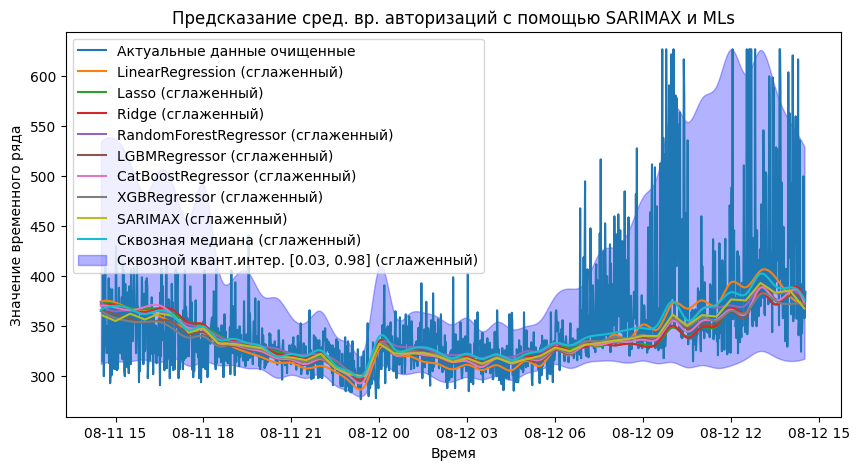

In [54]:
# Строим графики
upper = y_agg_resample['upper_quantile'].max()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test.apply(lambda x: upper if x > upper else x), label='Актуальные данные очищенные')
for model_ML in models_ML:
  ax.plot(models_ML[model_ML]['y_pred_test_resample'], label=model_ML.__name__ + ' (сглаженный)')
#ax.plot(models_ML[best_model]['data_pred_test_resample'], label=best_model.__name__ + ' (сглаженный)')
ax.plot(y_pred_test_sarima.y, label='SARIMAX (сглаженный)')
ax.plot(y_agg_resample['median'], label='Сквозная медиана (сглаженный)')
ax.fill_between(y_agg_resample.index, y_agg_resample['lower_quantile'], y_agg_resample['upper_quantile'],
     alpha=0.3, label=f'Сквозной квант.интер. {quantiles} (сглаженный)', color='blue')
ax.set_xlabel('Время')
ax.set_ylabel('Значение временного ряда')
ax.set_title('Предсказание сред. вр. авторизаций c помощью SARIMAX и MLs')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Сглаженные прогнозы по всем моделям практически не отличаются друг от друга. Все модели предсказали мат.ожидание временного ряда на основании аналогичных минут за несколько предшествующих суток. Рассмотрим детально на результаты прогноза, в крупном масштабе визуализации (за меньший период).

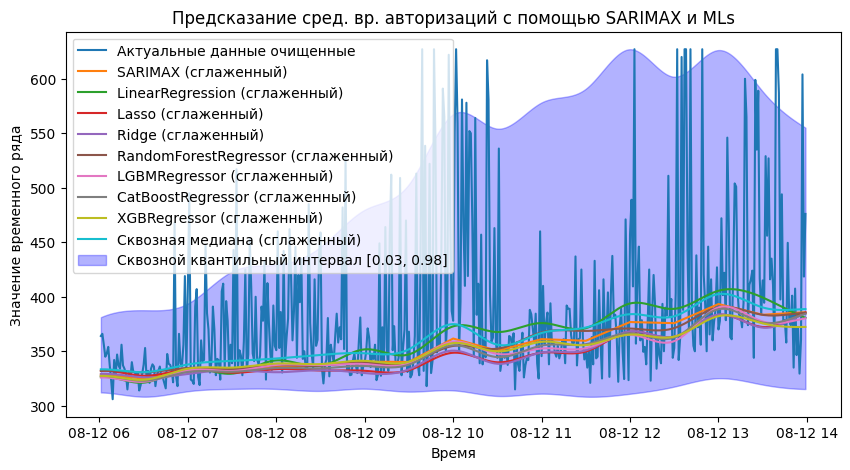

In [55]:
h = 480
compare_start = pd.to_datetime('2024-08-12 6:00')
compare_stop = compare_start + pd.Timedelta(h, "m")
y_test_ = y_test[(y_test.index>compare_start)&(y_test.index<compare_stop)]
y_agg_resample_ = y_agg_resample[y_agg_resample.index.isin(y_test_.index)]
upper = y_agg_resample_['upper_quantile'].max()
# Строим графики
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test_.apply(lambda x: upper if x > upper else x), label='Актуальные данные очищенные')
ax.plot(y_pred_test_sarima[y_pred_test_sarima.index.isin(y_test_.index)].y, label='SARIMAX (сглаженный)')
for index, model_ML in enumerate(models_ML):
  y_pred_test_ = models_ML[model_ML]['y_pred_test_resample']
  ax.plot(y_pred_test_[y_pred_test_.index.isin(y_test_.index)],
          label=model_ML.__name__ + ' (сглаженный)')
ax.plot(y_agg_resample[y_agg_resample.index.isin(y_test_.index)]['median'], label='Сквозная медиана (сглаженный)')

ax.fill_between(y_agg_resample_.index, y_agg_resample_['lower_quantile'], y_agg_resample_['upper_quantile'],
     alpha=0.3, label=f'Сквозной квантильный интервал {quantiles}', color='blue')
ax.set_xlabel('Время')
ax.set_ylabel('Значение временного ряда')
ax.set_title('Предсказание сред. вр. авторизаций c помощью SARIMAX и MLs')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Мы знаем, что значения данного временного ряда не отличаются друг от друга в вечерние, ночные и утренние часы. Мы видим, что кривая сквозной медианы в это время минимально отличается от прогноза моделей. Что не скажешь в полуденные часы, когда идет пиковая нагрузка на процессинговый центр. В эти часы значения временнного ряда зависят в давности, т.е. в часы пиковой нагрузки данные не статичны и имеют определенную цикличность. Мы видим, что в этот период сквозная медиана уходит вверх, и показывает нам простую медиану на каждый момент времени сковозь все сутки. Кривые прогноза моделей в часы пиковой нагрузки идут ниже кривой скозной медианы, за исключением кривой линейной регрессии, т.к. данная модель не улавливает кривые зависимости, а только прямые. Это пример показывает нам, насколько не заменимым является прогноз моделей ML с использованием признаков пониномов, а также моделей решающих деревьев и ансамдельных моделей.

Выведем показатели моделей.

In [56]:
print('Итоговые результаты:')
display(data_result)

Итоговые результаты:


Время обучения Обучающие метрики                       \
                                                     R2      MAPE        MAE   
Модель                                                                         
SARIMAX (downsampling)     614.352235          0.800579  0.021735   8.036369   
SARIMAX                    614.352235          0.350497  0.073139  27.730928   
LinearRegression             0.275033          0.309649  0.074141  28.161146   
Lasso                       14.364953          0.387489  0.067958  25.868082   
Ridge                       27.708636          0.418957  0.062171  23.908818   
RandomForestRegressor       27.733650          0.466924  0.065112  24.725444   
LGBMRegressor                1.396009          0.449640  0.063895  24.372822   
CatBoostRegressor           11.209862          0.438437  0.063568  24.288450   
XGBRegressor                11.952876          0.418118  0.062504  24.118060   

                                    Тестовые метрики                       \
                                MSE               R2      MAPE        MAE   
Модель                                                                      
SARIMAX (downsampling)   247.363282         0.493917  0.041861  16.469421   
SARIMAX                 2050.288947         0.216074  0.068456  27.863274   
LinearRegression        2179.156815         0.247028  0.071440  28.577344   
Lasso                   1933.448070         0.187395  0.065697  26.860291   
Ridge                   1834.116086         0.214302  0.060364  24.980016   
RandomForestRegressor   1682.702281         0.228739  0.063911  26.051534   
LGBMRegressor           1737.261071         0.234991  0.060223  25.023654   
CatBoostRegressor       1772.625782         0.228834  0.060611  25.034244   
XGBRegressor            1836.762158         0.224911  0.060564  25.280216   

                                     
                                MSE  
Модель                               
SARIMAX (downsampling)   783.337800  
SARIMAX                 2898.787559  
LinearRegression        2781.203000  
Lasso                   3001.463643  
Ridge                   2902.081100  
RandomForestRegressor   2848.757084  
LGBMRegressor           2825.661479  
CatBoostRegressor       2848.404777  
XGBRegressor            2862.893344

И так, по показателю производительности наиболее предпочтительно выглядит модель линейной регресси, но данная модель обладают не самыми лучшими тестовыми метриками MAPE и MAE, хотя метрика R2 у данной модели не плохая (R2 метрика показывает насколько MSE между прогнозом и правильными ответами, лучше чем MSE между средним и правильными ответами), поэтому и метрика MSE тоже лучше чем у линейных моделей с признаками пониномами. Мы знаем, что зависимость значений данного временного ряда от давности суток не прямолинейна, поэтому мы не можем использовать модель линейной регрессии. Ridge в данном конктретном примере по показалелю проиводительности и по тестовой метрике выглядит чуть лучше чем Lasso, но данная модель проигрывает ансамдельным моделям по производительности   и по некоторым тестовым метрикам.

Среди ансамдельных моделей, в данном конкретном случае, лучшая по производительности модель LGBMRegressor. Незначительно проигрывает по производительности, но выигрывает по тестовым метрикам модель CatBoostRegressor.


In [57]:
best_model_ML = CatBoostRegressor

Теперь нам осталось выстроить интервал прогнозирования, пределы которого будут включать в себя нормальные значения временного ряда, все остальное это аномалии. Мы знаем, что каждую минуту значения временного ряда имеют разные статистические характеристики, по этому ширина интревала прогнозрования должна быть тоже разная каждую минуту. А также в правой стороны интервал прогнозирования должен быть больше чем слевой, т.к. зачастую максимальные значения временного ряда сильнее отличаются от предсказанной величины, чем минимальные. Т.е. аномалии чаще всего бывают ввиде всплесков, а не просадок.

Объявим вспомогательную функцию по вычислению остаточной стандартной ошибки: residual standard error (RSE).

In [58]:
def get_rse(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    n = y_true.shape[0]
    if n - 2 > 0:
        y_predicted = np.array(y_predicted)
        rss = np.sum(np.square(y_true - y_predicted))
        return np.sqrt(rss / (n - 2))
    else:
        return 0

Прогноз по определению это приближение, которое содержит некоторую неопределенность. Модель выдает наилучшее приближение, но модель все равно будет делать ошибки. Учитывая это, прогноза модели недостаточно для описания истинной неопределенности.

Интервал прогнозирования описывает вероятностные верхние и нижние границы выдаваемого предсказания моделью, с заданной степенью уверенности. Интервал прогнозирования охватывает прогноз, сделанный моделью, и, как мы надеемся, охватывает диапазон истинного результата.

Т.к. модель была обучена на данных очищенных от аномалий, то предсказания модели не должны быть аномальными, следовательно и интервал прогнозирования не должен включать в себя аномалии.

И так, мы получили прогноз на каждую минуту на сутки в перед.
Отдельный интервал прогнозирования будем вычислять отдельно  вокруг каждого прогнозного значения, следующим образом:
$$yhat +/- z * sigma$$

Где $yhat$ — прогнозируемое значение, $z$ — число стандартных отклонений от гауссовского распределения (например, 1,96 для 95% интервала), а $sigma$ — стандартное отклонение прогнозируемого распределения. На практике мы этого не знаем. Мы можем рассчитать несмещенную оценку прогнозируемого стандартного отклонения следующим образом (взято из подходов машинного обучения для оценки интервала прогнозирования для выходных данных модели):
$$stdev = \sum_{i=1}^{N} \sqrt{1 / (N - 2) * e(i)^2}$$

Где $stdev$ — несмещенная оценка стандартного отклонения для прогнозируемого распределения, $N$ — общее количество сделанных прогнозов (в нашем случае, прогноз один, но он сравнивается со значениями временного ряда в аналогичные минуты $N$ предшествующих суток), а $e(i)$ — разница между i-м прогнозом и актуальным значением (в нашем случае разница между прогнозом и значениями временного ряда в аналогичную минуту $i$-х суток).  

Подробное описание методики вычисления инервалов прогнозирования можно изучить здесь:
- https://machinelearningmastery.com/prediction-intervals-for-machine-learning/
- https://otexts.com/fpp2/prediction-intervals.html

In [59]:
prediction_level = 0.95
boundaries = round((1 - prediction_level) / 2, 2)
quantiles = [boundaries, prediction_level + boundaries]
# Зададим степень уверенности
gamma = prediction_level
# Уровень значимости
alpha = 1 - gamma
# Размер выборки
n = int(y_train.shape[0] / season)
# Число степеней свободы
k = n - 1
# t-критическое
t_crit = -t.ppf(alpha/2, k)
def get_prediction_interval(series):
  # Получим серию значений временного ряда за аналогичные минуты в пред. n суток
  y = y_train[y_train.index.time == datetime.time(series.name.hour, series.name.minute)]
  # Расчитаем отдельно верхную и нижнюю границы
  # Отфильтруем актуальные значения отдельно
  y_true_upper = y[y>series.y]
  y_true_lower = y[y<series.y]
  # Получим остаточную стандартную ошибку
  rse_upper = get_rse(y_true_upper, series.y)
  rse_lower = get_rse(y_true_lower, series.y)
  # погрешность
  eps_upper = t_crit * rse_upper
  eps_lower = t_crit * rse_lower
  # левая (нижняя) граница
  lower_bound = series.y - eps_lower
  # правая (верхняя) граница
  upper_bound = series.y + eps_upper
  return lower_bound, upper_bound

Вычислим границы интервала прогнозирования для каждой минуты тестовой выборки, сохраним результат в выборку для хранения предсказаний модели.

In [60]:
y_pred_test_ML = models_ML[best_model_ML]['y_pred_test']
y_pred_test_ML[['lower_bound', 'upper_bound']] = y_pred_test.apply(get_prediction_interval, axis=1).to_list()

Сделаем сглаживание прогноза и интервала прогнозирования.

In [61]:
y_pred_test_ML_resample = y_pred_test_ML.resample('30min', label='left', closed='right').mean()
y_pred_test_ML_resample = y_pred_test_ML_resample.resample('min').mean().interpolate('polynomial', order=3)

Визуализируем полученный прогноз и интревал прогнозирования, на фоне актуальных значений тестовой выборки и скозных статистических характеристих тренировочной выборки.

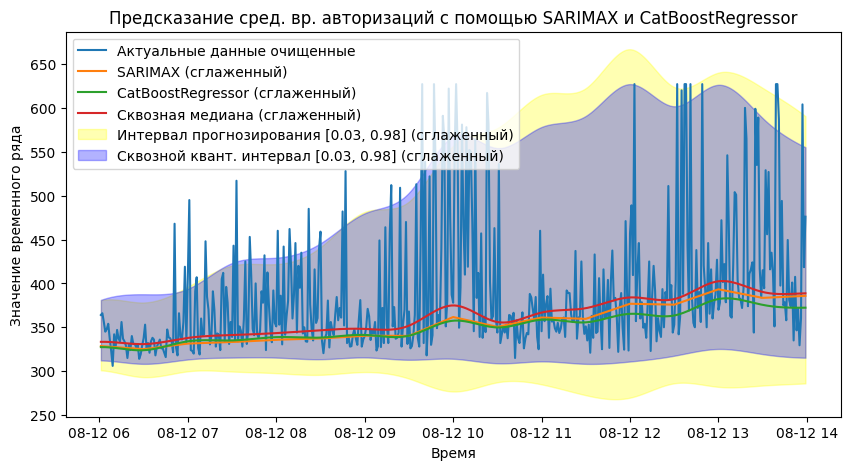

In [62]:
# Строим графики
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test_.apply(lambda x: upper if x > upper else x), label='Актуальные данные очищенные')
ax.plot(y_pred_test_sarima[y_pred_test_sarima.index.isin(y_test_.index)].y, label='SARIMAX (сглаженный)')
y_pred_test_ML_resample_ = y_pred_test_ML_resample[y_pred_test_ML_resample.index.isin(y_test_.index)]
ax.plot(y_pred_test_resample[y_pred_test_resample.index.isin(y_test_.index)].y,
          label=best_model_ML.__name__ + ' (сглаженный)')
ax.plot(y_agg_resample[y_agg_resample.index.isin(y_test_.index)]['median'], label='Сквозная медиана (сглаженный)')
ax.fill_between(y_pred_test_ML_resample_.index, y_pred_test_ML_resample_['lower_bound'],
                y_pred_test_ML_resample_['upper_bound'],
     alpha=0.3, label=f'Интервал прогнозирования {quantiles} (сглаженный)', color='yellow')
ax.fill_between(y_agg_resample_.index, y_agg_resample_['lower_quantile'], y_agg_resample_['upper_quantile'],
     alpha=0.3, label=f'Сквозной квант. интервал {quantiles} (сглаженный)', color='blue')
ax.set_xlabel('Время')
ax.set_ylabel('Значение временного ряда')
ax.set_title(f'Предсказание сред. вр. авторизаций c помощью SARIMAX и {best_model_ML.__name__}')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Построенная область из интервалов прогнозирования по верхней границе практически совпадает с областью построенной из квантильных интервалов, за исключением незначительных расхождений, связанных с тем, что модель  уловила кривую изменения мат.ожидания временного ряда с течением времени. Нижние границы не совподают. Мы знаем, что квантильный интервал описывает статистическую характеристику обучающей выборки, а за пределы его нижней границы ничего не должно выходить, однако, интревал прогнозирования, находится на много ниже. Все дело в том, что нижняя граница интервала прогнозирования была бы еще ниже, в плоть до нуля и ниже, если бы верхние и нижние границы вычилялись бы одинаково. Такая область прогназирования нам не подошла бы, т.к. нулевые значения это уже аномалия.  Нижняя граница интервала прогнозирования это всего лишь результат вычисления, в котором задейстована степень уверенности, и при необходимости ее можно учитывать отдельно для каждой границы, тем самым отдельно регулировать отступ от прогноза до нижней границы.

И так мы выстроили интревал прогнозирования и теперь можем стравнинвать его с актульными значениями, все что выходит за границы считается аномалией, а как реагировать на выявленные аномалии, это уже отдельная тема.

Давайте попробуем альтернативные методы анализа временных рядов.

# Модель Prophet

Рассмотрим альтернативные методы анализа временных рядов. Один из них это Prophet. Данный метод лучше всего работает с временными рядами, которые имеют сильные сезонные эффекты, а данные накоплены за несколько сезонов. В нашем случае, мы имее ежедневную сезонность.

Подготовим датасет для модели Prophet.

In [63]:
data_Prophet = data_ready[['y']].copy()
data_Prophet = data_Prophet.reset_index()
data_Prophet = data_Prophet.rename(columns={'date_time': 'ds'})
data_Prophet.head()

,ds,y
0,2024-07-13 14:33:00,409.0
1,2024-07-13 14:34:00,547.0
2,2024-07-13 14:35:00,448.0
3,2024-07-13 14:36:00,415.0
4,2024-07-13 14:37:00,359.0


Разделим выборку на обучающий и тестовый наборы данных.

In [64]:
# Вычислим момент времени для разделения датачета на тренировочную и тестовую выборки
split_datetime = data_Prophet.ds.max() - pd.to_timedelta(1, 'd')
# Создадим тренировочную и тестовую выборки
data_train = data_Prophet[data_Prophet.ds<=split_datetime]
data_test = data_Prophet[data_Prophet.ds>split_datetime]
print(f'Размер тренировочной выборки: {data_train.shape}, начало: {data_train.index.min()}, конец: {data_train.index.max()}')
print(f'Размер тестовой выборки: {data_test.shape}, начало: {data_test.index.min()}, конец: {data_test.index.max()}')

Размер тренировочной выборки: (41760, 2), начало: 0, конец: 41759
Размер тестовой выборки: (1440, 2), начало: 41760, конец: 43199


Инициализируем модель с оптимальными параметрами и запустим обучение, без экзогенной переменной: давность данных, т.к. эффекта от этого нет.

In [65]:
# Обучим модель
start_time = time.time()
model = Prophet(yearly_seasonality=False, weekly_seasonality=False,
                daily_seasonality=True, interval_width=0.99,
                changepoint_prior_scale=0.01, seasonality_prior_scale= 0.01)
model.fit(data_train)
duration_fit_Prophet = time.time() - start_time

DEBUG:cmdstanpy:input tempfile: /tmp/tmpryyey1pe/3ulrhikq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpryyey1pe/dkxdt9pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82108', 'data', 'file=/tmp/tmpryyey1pe/3ulrhikq.json', 'init=/tmp/tmpryyey1pe/dkxdt9pk.json', 'output', 'file=/tmp/tmpryyey1pe/prophet_modelwl53hc74/prophet_model-20240908122159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Получим прогноз значений временного ряда на сутки вперед.

In [66]:
h = data_test.shape[0]
future = model.make_future_dataframe(periods=h, freq = 'min')
data_pred_Prophet = model.predict(future, )[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
data_pred_Prophet = data_pred_Prophet.set_index('ds')
y_pred_train_Prophet = data_pred_Prophet[data_pred_Prophet.index.isin(data_train.ds)]
y_pred_test_Prophet = data_pred_Prophet[data_pred_Prophet.index.isin(data_test.ds)]

Визуализируем полученный результат, и сравним его с другими моделями.

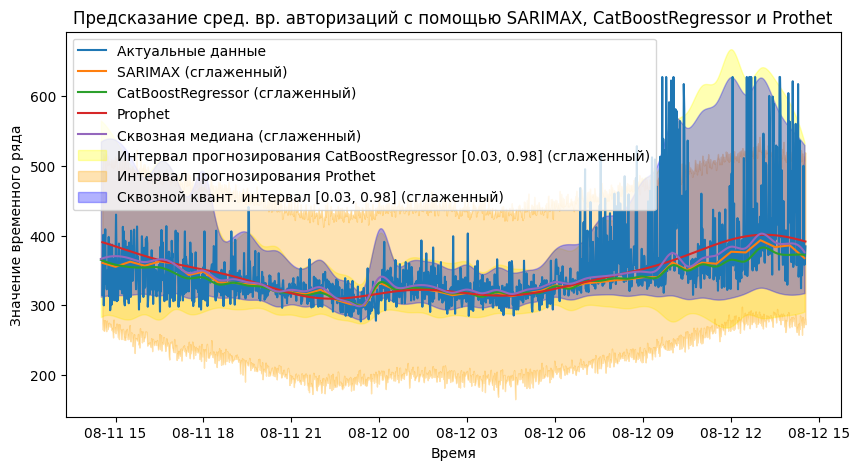

In [67]:
# Строим графики
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test.apply(lambda x: upper if x > upper else x), label='Актуальные данные')
ax.plot(y_pred_test_sarima.y, label='SARIMAX (сглаженный)')
ax.plot(y_pred_test_resample.y,
          label=best_model_ML.__name__ + ' (сглаженный)')
ax.plot(y_pred_test_Prophet.yhat, label='Prophet')
ax.plot(y_agg_resample['median'], label='Сквозная медиана (сглаженный)')
ax.fill_between(y_pred_test_ML_resample.index, y_pred_test_ML_resample['lower_bound'],
                y_pred_test_ML_resample['upper_bound'],
     alpha=0.3, label=f'Интервал прогнозирования {best_model_ML.__name__} {quantiles} (сглаженный)', color='yellow')

ax.fill_between(y_pred_test_Prophet.index, y_pred_test_Prophet['yhat_lower'],
                y_pred_test_Prophet['yhat_upper'],
                alpha=0.3, label=f'Интервал прогнозирования Prothet', color='orange')
ax.fill_between(y_agg_resample.index, y_agg_resample['lower_quantile'], y_agg_resample['upper_quantile'],
     alpha=0.3, label=f'Сквозной квант. интервал {quantiles} (сглаженный)', color='blue')
ax.set_xlabel('Время')
ax.set_ylabel('Значение временного ряда')
ax.set_title(f'Предсказание сред. вр. авторизаций c помощью SARIMAX, {best_model_ML.__name__} и Prothet')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Визуально мы видим, что модель Prophet уловила сезонную зависимость временного ряда. Результаты прогноза модель выдала уже в сглаженном состоянии. Возможно по этому прогноз модели не совпадает с прогнозами остальных моделей в дневное время, когда идет максимальная нагрузкана процессинговый центр. Скорее всего, при обучении модели необходимо учитывать давность данных, что бы модель уловила изменение мат.ожидания временного ряда в дневные часы с течением суток. Но к сожалению, применение экзогенной переменной: давность данных не принесло измений в прогнозе. Интервал прогнозирования, который выдала модель не предусматривает зависимость шинины от момента времени, что не совсем соответсвует нашей задаче выявления аномалий.
Вычислим метрики модели и сохраним их в таблицу итоговых результатов.

In [68]:
model_name = 'Prophet'
# Сохраним продолжительность обучения модели в таблицу итоговых результатов
data_result.loc[model_name, 'Время обучения'] = duration_fit_Prophet
# Сделаем предсказание обучающей выборки
y_pred_train_Prophet = data_pred_Prophet[data_pred_Prophet.index.isin(data_train.ds)]
# Сохраним обучающие метрики в таблице итоговых результатов
metrics = get_metrics(data_train.y, y_pred_train_Prophet.yhat)
data_result.loc[model_name, [('Обучающие метрики', metric[0])
                      for metric in metrics]] = [metric[1] for metric in metrics]
# Сделаем предсказание тестовой выборки
y_pred_test_Prophet = data_pred_Prophet[data_pred_Prophet.index.isin(data_test.ds)]
# Сохраним тестовые метрики в таблице итоговых результатов
metrics = get_metrics(data_test.y, y_pred_test_Prophet.yhat)
data_result.loc[model_name, [('Тестовые метрики', metric[0])
                      for metric in metrics]] = [metric[1] for metric in metrics]
# Логируем метрики
experiment.log_other('result ' + model_name, data_result.loc[model_name].to_dict())
print('Итоговые результаты:')
data_result

Итоговые результаты:


Время обучения Обучающие метрики                       \
                                                     R2      MAPE        MAE   
Модель                                                                         
SARIMAX (downsampling)     614.352235          0.800579  0.021735   8.036369   
SARIMAX                    614.352235          0.350497  0.073139  27.730928   
LinearRegression             0.275033          0.309649  0.074141  28.161146   
Lasso                       14.364953          0.387489  0.067958  25.868082   
Ridge                       27.708636          0.418957  0.062171  23.908818   
RandomForestRegressor       27.733650          0.466924  0.065112  24.725444   
LGBMRegressor                1.396009          0.449640  0.063895  24.372822   
CatBoostRegressor           11.209862          0.438437  0.063568  24.288450   
XGBRegressor                11.952876          0.418118  0.062504  24.118060   
Prophet                      9.681816          0.295084  0.076640  28.982228   

                                    Тестовые метрики                       \
                                MSE               R2      MAPE        MAE   
Модель                                                                      
SARIMAX (downsampling)   247.363282         0.493917  0.041861  16.469421   
SARIMAX                 2050.288947         0.216074  0.068456  27.863274   
LinearRegression        2179.156815         0.247028  0.071440  28.577344   
Lasso                   1933.448070         0.187395  0.065697  26.860291   
Ridge                   1834.116086         0.214302  0.060364  24.980016   
RandomForestRegressor   1682.702281         0.228739  0.063911  26.051534   
LGBMRegressor           1737.261071         0.234991  0.060223  25.023654   
CatBoostRegressor       1772.625782         0.228834  0.060611  25.034244   
XGBRegressor            1836.762158         0.224911  0.060564  25.280216   
Prophet                 2225.131045         0.260357  0.073087  28.894141   

                                     
                                MSE  
Модель                               
SARIMAX (downsampling)   783.337800  
SARIMAX                 2898.787559  
LinearRegression        2781.203000  
Lasso                   3001.463643  
Ridge                   2902.081100  
RandomForestRegressor   2848.757084  
LGBMRegressor           2825.661479  
CatBoostRegressor       2848.404777  
XGBRegressor            2862.893344  
Prophet                 2731.969927

Мы видим, что модель Prophet минимально переобучена, и метирики R2 и MSE показывают не плохие результаты, хотя метрики MAPE и MAE немного отстают от остальных моделей. Производительность модели не хуже чем у моделей ML. Использование потенциала, метода Prothet в рамках данного проекта не раскрыта, возможно, требуется подобрать наибоее оптимальные гиперпараметры и использовать экзогенные переменные, но сходу этого сделать не получилось.

# Модель NeuralProphet

Модель NeuralProphet — основанная на PyTorch усовершенствованная и более сложная модель, которая комбинирует в себе преимущества традиционных моделей для анализа временных рядов и методов глубокого обучения.
Инициализируем и обучим модель с гиперпараметрами по умолчанию.

In [69]:
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]
set_random_seed(42)
set_log_level("ERROR")
# Обучим модель
start_time = time.time()
m = NeuralProphet(loss_func='MSE', quantiles=quantiles)
# обучаем модель
metrics = m.fit(data_train, progress='bar', freq='min')
duration_fit_NeuralProphet = time.time() - start_time

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/265 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 128. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Получим прогноз мат.ожидания и интервал прогнозирования на сутки вперед.

In [70]:
future = m.make_future_dataframe(df=data_train, periods=1440, n_historic_predictions=True)
forecast = m.predict(future)
index_yhat1 = list(forecast.columns).index('yhat1')
columns_interval = list(forecast.columns[index_yhat1+1:index_yhat1+3])
y_pred_NeuralProphet = forecast[['ds', 'yhat1'] + columns_interval]
y_pred_NeuralProphet = y_pred_NeuralProphet.rename(columns=
                        {columns_interval[0]: 'yhat_lower', columns_interval[1]: 'yhat_upper'})
y_pred_NeuralProphet = y_pred_NeuralProphet.set_index('ds')
y_pred_train_NeuralProphet = y_pred_NeuralProphet[y_pred_NeuralProphet.index.isin(data_train.ds)]
y_pred_test_NeuralProphet = y_pred_NeuralProphet[y_pred_NeuralProphet.index.isin(data_test.ds)]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])

  df = pd.concat([df, future_df])



Predicting: |          | 0/? [00:00<?, ?it/s]

Визуализируем полученный прогноз и сравним с прогнозами других моделей.

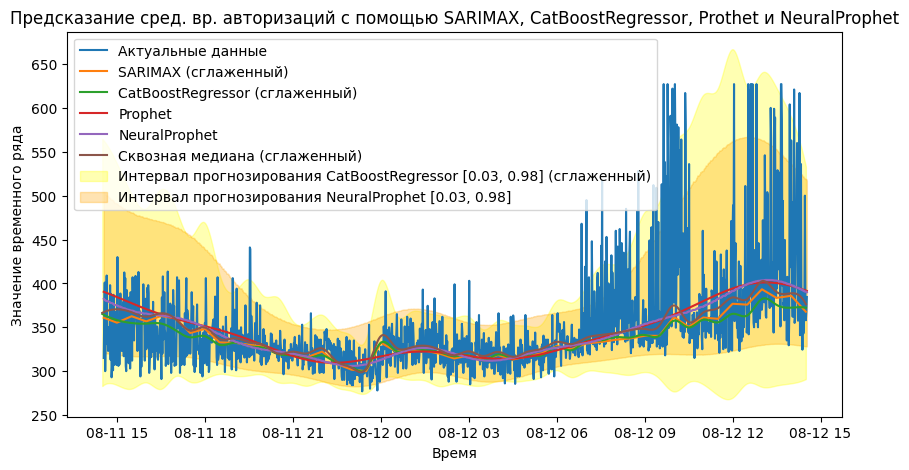

In [71]:
# Строим графики
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test.apply(lambda x: upper if x > upper else x), label='Актуальные данные')
ax.plot(y_pred_test_sarima.y, label='SARIMAX (сглаженный)')
ax.plot(y_pred_test_resample.y,
          label=best_model_ML.__name__ + ' (сглаженный)')
ax.plot(y_pred_test_Prophet.yhat, label='Prophet')
ax.plot(y_pred_test_NeuralProphet.yhat1, label='NeuralProphet')
ax.plot(y_agg_resample['median'], label='Сквозная медиана (сглаженный)')
ax.fill_between(y_pred_test_ML_resample.index, y_pred_test_ML_resample['lower_bound'],
                y_pred_test_ML_resample['upper_bound'],
     alpha=0.3, label=f'Интервал прогнозирования {best_model_ML.__name__} {quantiles} (сглаженный)', color='yellow')

ax.fill_between(y_pred_test_NeuralProphet.index, y_pred_test_NeuralProphet['yhat_lower'],
                y_pred_test_NeuralProphet['yhat_upper'],
                alpha=0.3, label=f'Интервал прогнозирования NeuralProphet {quantiles}', color='orange')
#ax.fill_between(y_agg_resample.index, y_agg_resample['lower_quantile'], y_agg_resample['upper_quantile'],
#     alpha=0.3, label=f'Сквозной квант. интервал {quantiles} (сглаженный)', color='blue')
ax.set_xlabel('Время')
ax.set_ylabel('Значение временного ряда')
ax.set_title(f'Предсказание сред. вр. авторизаций c помощью SARIMAX, {best_model_ML.__name__}, Prothet и NeuralProphet')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Мы видим, что прогноз NeuralProphet незначительно лучше чем Prothet. Здесь вопрос о том, что модель не уловила кривую изменения мат.ожидания в дневное время остается открытым. Возможно требуется дополнительная настройка гиперпараметров, и/или применение временных признаков в качестве экзогенной переменной. В случае с NeuralProphet интервал прогназирования, выглядит наиболее ближе к требуемогу результату и показывает нам область нормальных значений временного ряда в зависимости от времени суток.



In [72]:
model_name = 'NeuralProphet'
# Сохраним продолжительность обучения модели в таблицу итоговых результатов
data_result.loc[model_name, 'Время обучения'] = duration_fit_NeuralProphet
# Сохраним обучающие метрики в таблице итоговых результатов
metrics = get_metrics(data_train.y, y_pred_train_NeuralProphet.yhat1)
data_result.loc[model_name, [('Обучающие метрики', metric[0])
                      for metric in metrics]] = [metric[1] for metric in metrics]
# Сохраним тестовые метрики в таблице итоговых результатов
metrics = get_metrics(data_test.y, y_pred_test_NeuralProphet.yhat1)
data_result.loc[model_name, [('Тестовые метрики', metric[0])
                      for metric in metrics]] = [metric[1] for metric in metrics]
# Логируем метрики
experiment.log_other('result ' + model_name, data_result.loc[model_name].to_dict())
print('Итоговые результаты:')
data_result

Итоговые результаты:


Время обучения Обучающие метрики                       \
                                                     R2      MAPE        MAE   
Модель                                                                         
SARIMAX (downsampling)     614.352235          0.800579  0.021735   8.036369   
SARIMAX                    614.352235          0.350497  0.073139  27.730928   
LinearRegression             0.275033          0.309649  0.074141  28.161146   
Lasso                       14.364953          0.387489  0.067958  25.868082   
Ridge                       27.708636          0.418957  0.062171  23.908818   
RandomForestRegressor       27.733650          0.466924  0.065112  24.725444   
LGBMRegressor                1.396009          0.449640  0.063895  24.372822   
CatBoostRegressor           11.209862          0.438437  0.063568  24.288450   
XGBRegressor                11.952876          0.418118  0.062504  24.118060   
Prophet                      9.681816          0.295084  0.076640  28.982228   
NeuralProphet              211.587979          0.301217  0.076192  28.843703   

                                    Тестовые метрики                       \
                                MSE               R2      MAPE        MAE   
Модель                                                                      
SARIMAX (downsampling)   247.363282         0.493917  0.041861  16.469421   
SARIMAX                 2050.288947         0.216074  0.068456  27.863274   
LinearRegression        2179.156815         0.247028  0.071440  28.577344   
Lasso                   1933.448070         0.187395  0.065697  26.860291   
Ridge                   1834.116086         0.214302  0.060364  24.980016   
RandomForestRegressor   1682.702281         0.228739  0.063911  26.051534   
LGBMRegressor           1737.261071         0.234991  0.060223  25.023654   
CatBoostRegressor       1772.625782         0.228834  0.060611  25.034244   
XGBRegressor            1836.762158         0.224911  0.060564  25.280216   
Prophet                 2225.131045         0.260357  0.073087  28.894141   
NeuralProphet           2205.771930         0.270058  0.070985  28.252864   

                                     
                                MSE  
Модель                               
SARIMAX (downsampling)   783.337800  
SARIMAX                 2898.787559  
LinearRegression        2781.203000  
Lasso                   3001.463643  
Ridge                   2902.081100  
RandomForestRegressor   2848.757084  
LGBMRegressor           2825.661479  
CatBoostRegressor       2848.404777  
XGBRegressor            2862.893344  
Prophet                 2731.969927  
NeuralProphet           2696.139936

И так, метрики NeuralProphet и Prophet практически не отличаются, время обучения NeuralProphet значительно больше чем у моделей ML и Prophet. Скорее всего модели ML для данной конкретной задачи наиболее предпочтительны. Хотя вполне возможно, здесь требуется наиболее углуится в методы Prophet и NeuralProphet, и тогда итоговый результат несколько другим.

Давайте рассмотрим механизм выявления аномалий.

# Механизм выявления аномалий временного ряда.

И так, мы получили прогноз с помощью разных методов, давайте остановимся на методе ML и далее определимся с механизмом выявления аномалий на основе последних нескольких актуальных значений и интервала прогнозирования, полученного на основе прогноза мат.ожидания.

Самый простой способ который приходит на ум, это ежеминутное считывание актуальных значений данных мониторинга и сравления их с соотвествующим интервалом прогнозирования. Если актуальные значения выходят за пределы данного интервала, тогда это аномалия. А далее должны срабалывать алгоритмы оповещения службы техничестой поддержки.

Но, что если нам не только выявлять уже случившиеся аномалии, а предсказывать из приближение, на основе поведения графика актуальных значений. Давайте с вами подумаем, что если нам взять последние n-ое количество актуальных значений, допустим за 30 минут. На основе полученной выборки построить вектор из 30 индексов от 0 до 29. Данный вектор рассматривать как обучающую выборку, актуальные значения за последние 30 минут рассматривать как целевой признак для обучения. Тогда мы с вами можем обучить модель МНК, это самая быстрая, хотя могут быть и другие варианты, и тем самым построить аппроксимацию последних 30 актуальных значений. Далее мы можем предсказать, что будет с временным рядом через 30 минут. Хотя это механизм далек от идеала, но не забываем, что приблизительность обходится дешевле.

И так, давайте приступим к моделированию прогноза  актуальных значений временного ряда на 30-ю минуту вперед от каждой минуты в тестовой выборке.

Для начала мы должны понимать, что актуалные значения, которые будут предсказываться на 30 минуту вперед, должны быть не очищенные от выбросов, но пропуски должны быть заполнены интеполяцией. Иначе мы будем моделировать не реальную ситацию, а штатную на основе очищенного целевого признака.

In [73]:
y_test_resample = y_test.resample('30min', label='left', closed='right').mean()
y_test_resample = y_test_resample.resample('min').mean().interpolate('polynomial', order=3)
y_test_original = data[data.index.isin(y_test.index)].y
y_test_original_resample = y_test_original.resample('30min', label='left', closed='right').mean()
y_test_original_resample = y_test_original_resample.resample('min').mean().interpolate('polynomial', order=3)

Построим кратковременные предсказания следующей 30 минуты, для каждой минуты тестовой выборки.

In [74]:
# Зададим глубину периода за который беруться актальные значения.
depth_past = 30
# Зададим глубину периода за который предсказываться актальные значения.
depth_future = 30
# Инициализируем модель МНК
model = LinearRegression()
# Сделаем заготовку серии прогнозных значений для каждой минуты тестовой выборки на заданную минуту вперед
forecast_ahead = pd.Series(name='y')
# Попутно будем выявлять аномалии,
# для этого сделаем заготовку серии для хранения булевого признака
# наличия аномалии в на определнный момент
alert = pd.Series(name='coming')
# Циктом по неочищенному целевому признаку сделаем прогноз
# заданной минуты в будущем для каждой минуты
# на основе предыдущих значений в заданном кол-ве
for index in y_test_original_resample.index[depth_past:-depth_future]:
  # Получим серию предыдущих значений
  series_train = y_test_original_resample.loc[index-pd.Timedelta(depth_past - 1,'min'):index]
  # Сформируем обучающую выборку
  y_train = series_train.to_numpy()
  X_train = np.arange(depth_past).reshape(-1, 1)
  # Тестовым исходным признаком будет заданная минута в будущем
  X_test = np.array(depth_past + depth_future - 1).reshape(-1, 1)
  # Обучим модель
  model.fit(X_train, y_train)
  # Сделаем прогноз значения временного ряда в заданной минуте в будущем
  y_pred_test = np.round(model.predict(X_test))[0]
  # Вычислим момент заданный времни
  index_future = index+pd.Timedelta(depth_future, 'min')
  # Сохраним полученный результат в серии для кратковременных прогнозных значений
  forecast_ahead.loc[index_future] = y_pred_test
  # Проверим, если предсказанное значение выходит за пределы
  # интервара предсказания нормальных значений,
  # тогда помечаем текущую минуту тестовой выбоки как время для оповещения и
  # начала принятия мер для устранения аномалии
  if ((y_pred_test_ML_resample.loc[index_future]['lower_bound'] > y_pred_test) or
      (y_pred_test_ML_resample.loc[index_future]['upper_bound'] < y_pred_test)):
    alert.loc[index] = 1

Визуализируем полученный результат.

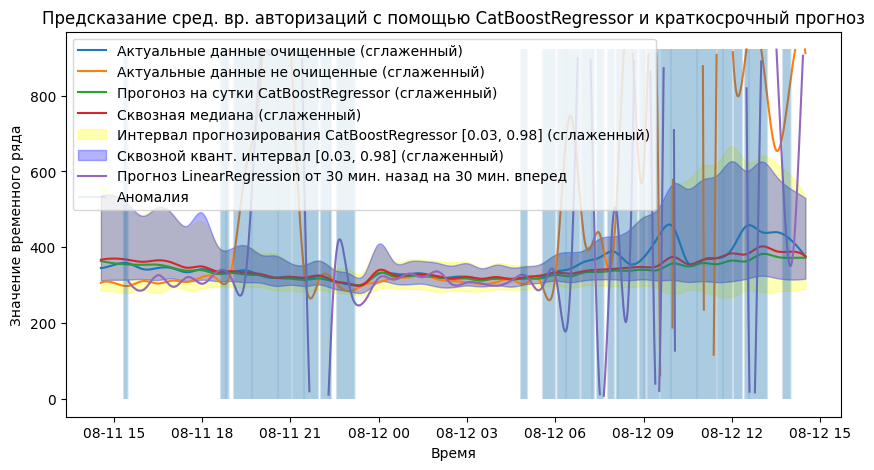

In [75]:
# Строим графики
upper = y_test.max()
lower = 0 #y_test.min() * 2
h = 1440
compare_start = pd.to_datetime('2024-08-11 14:33')
compare_stop = compare_start + pd.Timedelta(h, "m")
y_test_resample_ = y_test_resample[(y_test_resample.index>compare_start)
                                              &(y_test_resample.index<compare_stop)]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y_test_resample_.apply(lambda x: x if lower < x < upper else np.nan), label='Актуальные данные очищенные (сглаженный)')
y_test_original_resample_ = y_test_original_resample[y_test_original_resample.index.isin(y_test_resample_.index)]
ax.plot(y_test_original_resample_.apply(lambda x: x if lower < x < upper else np.nan), label='Актуальные данные не очищенные (сглаженный)')
ax.plot(y_pred_test_resample[y_pred_test_resample.index.isin(y_test_resample_.index)].y,
          label=f'Прогоноз на сутки {best_model_ML.__name__} (сглаженный)')
ax.plot(y_agg_resample[y_agg_resample.index.isin(y_test_original_resample_.index)]['median'], label='Сквозная медиана (сглаженный)')
y_pred_test_ML_resample_ = y_pred_test_ML_resample[y_pred_test_ML_resample.index.isin(y_test_resample_.index)]
ax.fill_between(y_pred_test_ML_resample_.index, y_pred_test_ML_resample_['lower_bound'],
                y_pred_test_ML_resample_['upper_bound'],
     alpha=0.3, label=f'Интервал прогнозирования {best_model_ML.__name__} {quantiles} (сглаженный)', color='yellow')
y_agg_resample_ = y_agg_resample[y_agg_resample.index.isin(y_test_resample_.index)]
ax.fill_between(y_agg_resample_.index, y_agg_resample_['lower_quantile'], y_agg_resample_['upper_quantile'],
     alpha=0.3, label=f'Сквозной квант. интервал {quantiles} (сглаженный)', color='blue')
ax.plot(forecast_ahead[forecast_ahead.index.isin(y_test_resample_.index)].apply(
    lambda x: x if lower < x < upper else np.nan),
        label=f'Прогноз LinearRegression от {depth_past} мин. назад на {depth_future} мин. вперед')
ax.vlines(alert[alert.index.isin(y_test_resample_.index)].index, 0,
          alert[alert.index.isin(y_test_resample_.index)] * upper, alpha=0.1, label='Аномалия')
ax.set_xlabel('Время')
ax.set_ylabel('Значение временного ряда')
ax.set_title(f'Предсказание сред. вр. авторизаций c помощью {best_model_ML.__name__} и краткосрочный прогноз')
plt.legend()
# Логируем гистограмму
experiment.log_figure(figure=plt)
plt.show()

Мы выидим, что наш механизм по проактивному выявлению аномалий, за заданное время вперед спрогнозировал значения временного ряда выходящие за рамки нормальных значений. Данный механизм, сам по себе очень прост, требует усовершенствования, но всему свое время. Для начала, требуется тестирование и обкатка на реальных данных. И далее по результатам тестирования и эксплуатации будут многократные циклические доработки. Ну, а теперь давайте сделаем пару выводов о проделанной работе.

# Выводы

Мы с вами провели не малую работу для достижения определенного результата. Мы очистили данные от выбросов и замелили их и пустоты свкозной медианой. Что само по себе является не стандартным решением. Обычно при использовании методов ML выбросы и пропуски удаляются или заменяются какими либо дельтами (среднее, медиана, мода и прочее). Далее мы провели статестические тесты по подтвеждению гипотез о налиии расходжнения данных в разных сутках отдельно по каждому часу, и это то же является не простым решением. Мы выявили, что в дневное время, в часы пиковой нагрузки, данные имеют статистически значимые расхождения, тогда как в остальные часы данные не меняются на протяжении всего периода исходных данных. Большим успехом было получение прогноза при помощи статистической модели SARIMAX. Модель уловила постепенное снижение мат.ожидания временного ряда благодаря использованию временного признака давности данных в сутках в качестве экзогенной переменной. Но сожалению данная модель обучается не допустимо долго, даже при уменьшении обучающей выборки путем downsampling'а. Иначе модель не обучилась бы и за сутки, проверено на colab'е с включенным графическим ускорителем. Проведена не малая работа, по использованию множества моделей ML, подобраны оптимальные гиперпараметры. Каждый может выбрать наиболее предпочтительный вариант. Проведен сравнительный анализ прогнозов разными моделями, в том числе и альтернативными вариантами.
В результате мы имеем програмное решение допустимого качества по выполнению задачи поставленной в данном проекте. И это всего лишь начало, большого пути.Далее требуется реализовать данный проект в продакшн. Автор данного проекта надется, что данное решение найдет свое применение в компании, в которой он работает.

Всем спасибо за внимание.

С Уважением!

Скорняков Александр.

In [76]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : subsequent_stud_6578
COMET INFO:     url                   : https://www.comet.com/askornyakov1977/anomaly-detector/472ae0e583054fc6b8e29c7a7422d4c3
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     Loss [40]       : (0.050759874284267426, 0.282766729593277)
COMET INFO:     MAE [40]        : (28.71114730834961, 44.33969497680664)
COMET INFO:     RMSE [40]       : (46.0821647644043, 63.49554443359375)
COMET INFO:     RegLoss         : 0.0
COMET INFO:     epoch [40]      : (0, 39)
COMET INFO:     hp_metric       : -1
COMET INFO:     loss [1308]     : (0.016596566885709763, 1.1625254